# Credibility Checker - A foray into detecting fake news and separating it from real news

### Overview: 
In this practical application, we answer the question 'What is the most effective model for determining whether a news article is real or fake?'

Following CRISP-DM method.

### Motivation:
NEWS has always been a critical source of truth and information of world events that affect everybody. In an era of widespread misinformation, distinguishing real news from fake is critical to maintaining an informed public. This project is an initial foray into classifying information vs disinformation by applying machine learning to classify news credibility, offering practical insights into automated fact-checking.

### The Data:

**Source** : The data is taken from Kaggle 'fake-and-real-news-dataset' (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data).


The dataset contains 2 separate CSV files one for real and one for fake news articles. The news articles are collected between years 2016 and 2017.
Both sheets contain 4 columns: Title, Text, Subject and Date.


Dataset columns:

* Title: title of news article
* Text: body text of news article
* Subject: subject of news article
* Date: publish date of news article



### Read in the Data


In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time

import warnings
warnings.simplefilter(action="ignore")

In [ ]:
### OPTIONAL: Read the data directly from the source KAGGLE: clmentbisaillon/fake-and-real-news-dataset ###

# # pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter


# # Load the latest version
# real_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "clmentbisaillon/fake-and-real-news-dataset",
#   "True.csv",
# )

# fake_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "clmentbisaillon/fake-and-real-news-dataset",
#   "Fake.csv",
# )

In [224]:
real_df = pd.read_csv("data/True.csv")
fake_df = pd.read_csv("data/Fake.csv")

In [225]:
real_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [226]:
real_df.shape

(21417, 4)

In [227]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

In [228]:
fake_df.shape

(23481, 4)

In [234]:
# label the data as True (1) or False (0)
real_df["label"]=1
fake_df["label"]=0

In [236]:
real_df.info()
# no null values in real dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [238]:
fake_df.info()
# no null values in fake dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [240]:
# Both datasets have same columns so we can combine them into single dataset
news = pd.concat([real_df,fake_df],ignore_index=True)

# Shuffle the dataset
news = news.sample(frac=1).reset_index(drop=True)

In [242]:
news

title  \
0                                           Black Student ‘Activist’ Jailed for Tweeting FAKE Racist Threats   
1                                                      Republican candidate Trump reverses stance on torture   
2                           Obamacare Vs Trumpcare Meme DESTROYS GOP’s Health Care Replacement Fail (TWEETS)   
3                                     Ex-Michigan lawmaker to stand trial; charges dismissed against another   
4                                        White House says more work needed on Republicans' Puerto Rico plan    
...                                                                                                      ...   
44893                   ON THE MOVE: [Video] Iranians, Russians And Syrians Set Up Coordination Cell In Iraq   
44894              BREAKING: Trump Campaign CAUGHT Paying Off Hillary-Hating Sexual Assault Victim (DETAILS)   
44895                          Trump Rally In Austin TX – Protesters Largely Outnumbered by Trump Supporters   
44896                                    Turkish court keeps opposition newspaper staff in jail during trial   
44897  JUDGE NAPOLITANO: Samsung Allowed British Intelligence to Spy on Americans Through Their TV’s [Video]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [244]:
news.shape

(44898, 5)

In [246]:
# Clean up the duplicates
news = news.drop_duplicates()
news.shape

(44689, 5)

In [247]:
# Drop the unnecessary columns:
# We are focusing on the Natural Language aspect of the dataset so the date columns is of no use for the scope this project
news.drop(columns = ["date"],inplace = True)
news.shape

(44689, 4)

In [250]:
# Find out if there are any null values
news.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [252]:
# Make sure that the columns are readable text and not some garbage
news["text"]=news["text"].astype(str)
news

title  \
0                                           Black Student ‘Activist’ Jailed for Tweeting FAKE Racist Threats   
1                                                      Republican candidate Trump reverses stance on torture   
2                           Obamacare Vs Trumpcare Meme DESTROYS GOP’s Health Care Replacement Fail (TWEETS)   
3                                     Ex-Michigan lawmaker to stand trial; charges dismissed against another   
4                                        White House says more work needed on Republicans' Puerto Rico plan    
...                                                                                                      ...   
44893                   ON THE MOVE: [Video] Iranians, Russians And Syrians Set Up Coordination Cell In Iraq   
44894              BREAKING: Trump Campaign CAUGHT Paying Off Hillary-Hating Sexual Assault Victim (DETAILS)   
44895                          Trump Rally In Austin TX – Protesters Largely Outnumbered by Trump Supporters   
44896                                    Turkish court keeps opposition newspaper staff in jail during trial   
44897  JUDGE NAPOLITANO: Samsung Allowed British Intelligence to Spy on Americans Through Their TV’s [Video]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### Understanding the Data



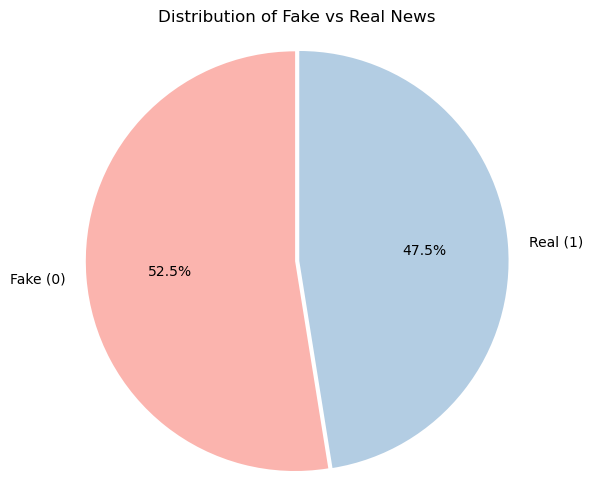

In [255]:
# Is the data balanced?
label_counts = news["label"].value_counts()
labels = ["Fake (0)", "Real (1)"]
sizes = [label_counts[0], label_counts[1]]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, 
        explode=(0.02, 0), colors=plt.cm.Pastel1.colors)
plt.title("Distribution of Fake vs Real News")
plt.axis("equal")  # Equal aspect ratio ensures the pie is a circle.
plt.savefig("images/fake_vs_real_distribution.png")
plt.show()

##### ==> Real vs Fake distribution is almost the same (looks like the differnece is intentional). Means the Data is balanced.

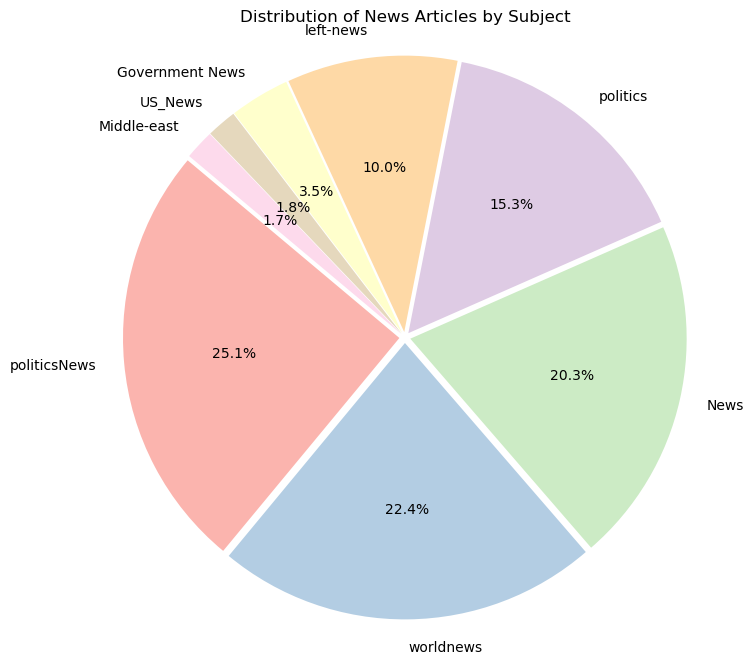

In [258]:
# Count the number of articles per subject
subject_counts = news["subject"].value_counts()

# Create an explode array to slightly separate all slices
explode = [0.02] * len(subject_counts)  # small offset for each slice

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, explode=explode,
        autopct="%1.1f%%", startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Distribution of News Articles by Subject")
plt.axis("equal")  # Ensures pie chart is a circle
plt.savefig("images/news_distribution_by_subject.png")
plt.show()

##### ==> Majority of the articles are related to politics or world events.
##### ==> Distribution of news articles by Subject is skewed. So we will ignore it to train the models.

In [261]:
news.drop(columns=["subject"], inplace=True)

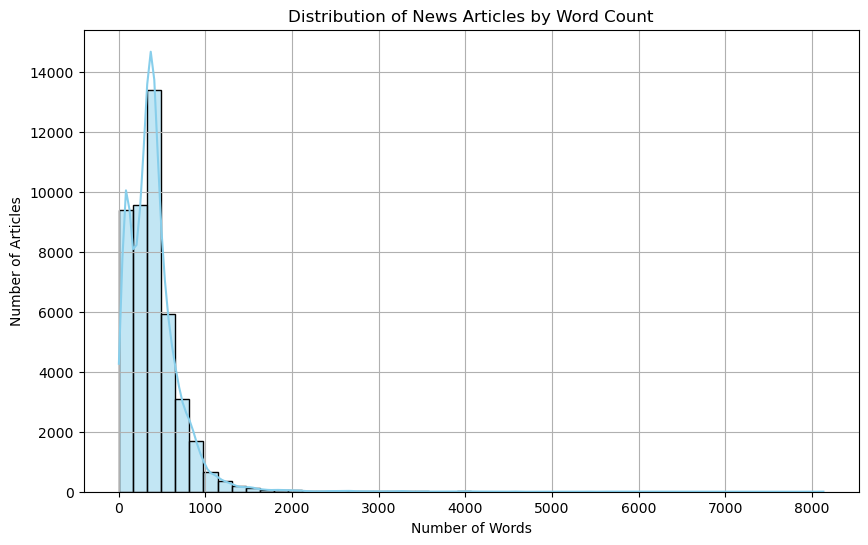

In [263]:
news["text_length"]=news["text"].apply(lambda a : len(a.split()))


plt.figure(figsize=(10, 6))
sns.histplot(news["text_length"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of News Articles by Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.savefig("images/news_distribution_by_word_count.png")
plt.show()

##### ==> There are few new articles longer than 1000 words.

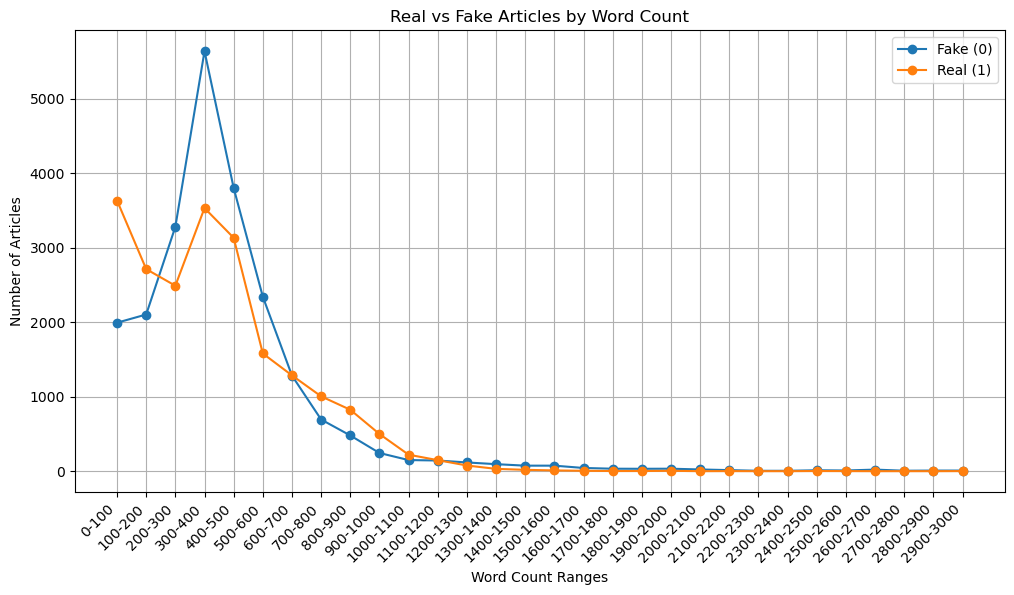

In [265]:
# Limit bin range up to 3000 words
max_length = 3000
bin_edges = range(0, max_length + 100, 100)  # bins of width 100
news["length_bin"] = pd.cut(news["text_length"], bins=bin_edges)

# Group by bin and label
length_dist = news.groupby(["length_bin", "label"]).size().unstack(fill_value=0)

# Prepare x-axis labels as midpoints of the bins
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in length_dist.index]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(bin_labels, length_dist[0], label="Fake (0)", marker="o")
plt.plot(bin_labels, length_dist[1], label="Real (1)", marker="o")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Word Count Ranges")
plt.ylabel("Number of Articles")
plt.title("Real vs Fake Articles by Word Count")
plt.legend()
plt.grid(True)
plt.savefig("images/fake_vs_real_distribution_by_word_count.png")
plt.show()

# clean up the dataset after visualizations
news.drop(columns=["text_length"], inplace=True)
news.drop(columns=["length_bin"], inplace=True)

### Preprocessing the text

In [268]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [269]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/npatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/npatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/npatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/npatil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [273]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [275]:
# Preprocess the text of the news articles. 
def process_text(text):
    text = re.sub(r"\s+", " ", text, flags=re.I) # Remove extra white space from text

    text = re.sub(r"\W", " ", str(text)) # Remove all the special characters from text

    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text) # Remove all single characters from text

    text = re.sub(r"[^a-zA-Z\s]", "", text) # Remove any character that isn"t alphabetical

    text = text.lower()

    words = word_tokenize(text) # Split the text into and array of individual words

    words = [lemmatizer.lemmatize(word) for word in words] # reduces words to their dictionary form (lemma)

    clean_words = [word for word in words if word not in stop_words] # remove the stop words

    cleaned_text = " ".join(clean_words) # make the array to be string again

    return cleaned_text

In [277]:
news["cleaned_text"] = news["text"].apply(process_text)

In [278]:
news.head(5)

,title,text,label,cleaned_text
0,Black Student ‘Activist’ Jailed for Tweeting FAKE Racist Threats,"21st Century Wire says What a twisted world we have become.A female, black student activist, Kayla McKelvey (image below), has been jailed for tweeting racially charged threats directed at events that she, herself, was organising and attending. She essentially employed the false flag attack model, where one claims to be under attack from another, who in actual fact has nothing to do with it, to further an agenda.The so-called activist pleaded guilty to causing false public alarm, but claimed the tweets were meant to raise awareness of racism on campus .One wonders how much racism there really is on campus, if someone has to deliberately go out of their way to create fake racial threats. This then raises the questions, what exactly did McKelvey hope to achieve by creating a threat to black people on campus?The threats caused Kean University to shell out $80,000 in additional security costs, costs that McKelvey will now be forced to repay after her 90 days behind bars.Such actions do absolutely nothing to raise awareness of racism , and only further racial divides. If we stop seeing race altogether, and instead see humanity, we can really solve the problem.Get 10% off a 21WIRE TV membership package today using promo code: STU21WIRETVMORE ON ERODING WESTERN CULTURE : 21st Century Wire Culture Files",0,st century wire say twisted world become female black student activist kayla mckelvey image ha jailed tweeting racially charged threat directed event wa organising attending essentially employed false flag attack model one claim attack another actual fact ha nothing agenda called activist pleaded guilty causing false public alarm claimed tweet meant raise awareness racism campus one wonder much racism really campus someone ha deliberately go way create fake racial threat raise question exactly mckelvey hope achieve creating threat black people campus threat caused kean university shell additional security cost cost mckelvey forced repay day behind bar action absolutely nothing raise awareness racism racial divide stop seeing race altogether instead see humanity really solve problem get wire tv membership package today using promo code stuwiretvmore eroding western culture st century wire culture file
1,Republican candidate Trump reverses stance on torture,"WASHINGTON (Reuters) - Republican presidential candidate Donald Trump softened his stance on torture on Friday, saying he would not order the U.S. military to break international laws on how to treat terrorism suspects, as the top U.S. military commander was asked to weigh in on his comments. “I do, however, understand that the United States is bound by laws and treaties and I will not order our military or other officials to violate those laws and will seek their advice on such matters,” Trump said in a statement to the Wall Street Journal. “I will not order a military officer to disobey the law. It is clear that as president I will be bound by laws just like all Americans and I will meet those responsibilities.” In a Republican presidential debate on Thursday night, Trump indicated he might order the U.S. military to break the law on interrogation tactics, including waterboarding. Trump also suggested his willingness to target the families of terrorist suspects. The exchange prompted Republican Senator Lindsey Graham, a former 2016 White House contender and frequent Trump critic, to send Gen. Joseph Dunford, the chairman of the Joint Chiefs of Staff, a letter asking his thoughts on whether targeting relatives of terrorist suspects was legal under the laws of war and whether waterboarding or other more extreme interrogation techniques were legal for the U.S. military. Dunford has yet to make a public response to Graham’s letter. Waterboarding is the practice of pouring water over someone’s face to mimic drowning as an interrogation tactic. Critics say it is torture. Democratic Presi

#### Lets see if we can observe difference between most common words in fake and real articles

In [280]:
from wordcloud import WordCloud

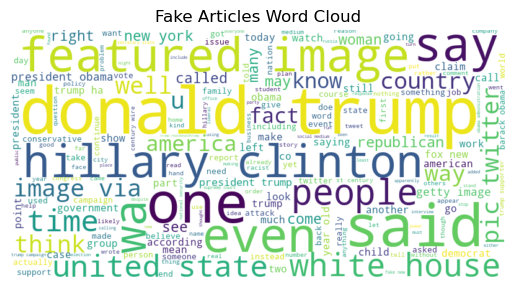

In [281]:
# word cloud for fake articles

fake_text=" ".join(news[news["label"]==0]["cleaned_text"])
wc_fake=WordCloud(width=800,height=400,background_color="white").generate(fake_text)

plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake Articles Word Cloud")
plt.savefig("images/fake_word_cloud.png")
plt.show()

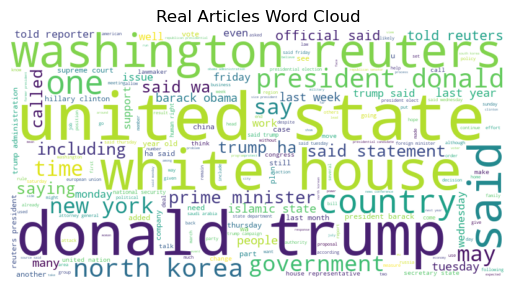

In [282]:
# word cloud for real articles

real_text=" ".join(news[news["label"]==1]["cleaned_text"])
wc_real=WordCloud(width=800,height=400,background_color="white").generate(real_text)

plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real Articles Word Cloud")
plt.savefig("images/real_word_cloud.png")
plt.show()

In [283]:
# Total uniq words in the dataset:

# Combine all cleaned text into one large string
all_words = " ".join(news["cleaned_text"])

# Split into individual words
word_list = all_words.split()

# Convert to set to get unique words
unique_words = set(word_list)

# Count unique words
num_unique_words = len(unique_words)

print(f"Total number of unique words: {num_unique_words}")

Total number of unique words: 106449


### Split and Vectorize the data

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [287]:
# Split data
X = news["cleaned_text"]
y = news["label"]  # 0 = Fake, 1 = Real

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### We have multiple ways to vectorize the words into numerical values.
Here we are using 2:
1. TF-IDF Vectorization: TF-IDF (Term Frequency–Inverse Document Frequency) is a text vectorization technique that reflects how important a word is to a document in a collection. The numerical value for a word increases with the number of times a word appears in a document (term frequency) but is offset by how common the word is across all documents (inverse document frequency).
2. BERT: BERT vectorization uses a pre-trained deep learning model (BERT: Bidirectional Encoder Representations from Transformers) to convert text into dense numerical embeddings that capture contextual meaning. Unlike traditional methods, BERT considers the entire sentence and the position of words to generate rich, semantic representations. 

In [289]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [290]:
# BERT Tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")
bert_model.eval()  # Set model to evaluation mode

# Function to get BERT embeddings for a batch of text
def bert_encode(texts, tokenizer, model, max_len=512, batch_size=16):
    all_embeddings = []

    dataloader = DataLoader(texts, batch_size=batch_size)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Encoding with BERT (batched)"):
            encoded = tokenizer(batch,
                                padding="max_length",
                                truncation=True,
                                max_length=max_len,
                                return_tensors="pt")
            outputs = model(**encoded)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token
            all_embeddings.append(cls_embeddings)

    return torch.cat(all_embeddings, dim=0).numpy()

In [291]:
# Generating BERT embeddings takes approzimately 2 hours for the given dataset.
# Generate BERT embeddings once and save them on disk and later load and use saved embeddings.
train_embeddings_path = "data/X_train_bert.npy"
test_embeddings_path = "data/X_test_bert.npy"

# Check and load or compute
if os.path.exists(train_embeddings_path) and os.path.exists(test_embeddings_path):
    X_train_bert = np.load(train_embeddings_path)
    X_test_bert = np.load(test_embeddings_path)
    print("Loaded BERT embeddings from file.")
else:
    X_train_bert = bert_encode(X_train.tolist(), tokenizer, bert_model, max_len=512)
    X_test_bert = bert_encode(X_test.tolist(), tokenizer, bert_model, max_len=512)
    np.save(train_embeddings_path, X_train_bert)
    np.save(test_embeddings_path, X_test_bert)
    print("Computed and saved BERT embeddings.")

Loaded BERT embeddings from file.


### Preparing to train clasification models

In [293]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [294]:
# Variables to record metrics
models = ["NaiveBayes", "LogisticRegression", "DecisionTree", "KNN", "SVM", "RandomForest"]
fit_times = []
test_accuracies = []
train_accuracies = []
recalls = []
f1_scores = []

In [295]:
# record and print model scores
def print_record_scores(model, train_time, train_accuracy, test_accuracy, recall_score, f1_score):
  # Record the scores of baseline model
  fit_times.append(train_time)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  recalls.append(recall_score)
  f1_scores.append(f1_score)

  # Print the scores
  # print("="*30 + " Model: {} ".format(model) + "="*30 + "\n")
  print("Model: {}".format(model))
  print("Train time (s): {}".format(train_time))
  print("Test Accuracy: {:.4f}".format(train_accuracy))
  print("Train Accuracy: {:.4f}".format(test_accuracy))
  print("Recall: {:.4f}".format(recall_score))
  print("f1 Score: {:.4f}".format(f1_score))

In [296]:
# Show metrics curves and reports in a subplot
def conf_matrix_roc_plot(model_name, model, X_test, y_test):
  print("="*100 + "\n")
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes = axes.ravel()

  # Build Confusion Matrix
  disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axes[0], display_labels=["Fake", "Real"])
  cm = disp.confusion_matrix
  axes[0].set_title("Confusion Matrix")
  # Annotate TP, FP, FN, TN
  labels = np.array([["TN", "FP"], ["FN", "TP"]])
  for i in range(2):
      for j in range(2):
          axes[0].text(j, i, f"{labels[i, j]}\n",
                  ha="center", va="bottom", color="black", fontsize=12)

  # Build ROC Curve
  preds_proba = model.predict_proba(X_test)
  yes_probs = preds_proba[::,1]
  roc_yes_fp, roc_yes_tp, roc_yes_threshold = roc_curve(y_true=y_test,  y_score=yes_probs, pos_label=1)
  roc_no_fp, roc_no_tp, roc_no_threshold = roc_curve(y_true=y_test,  y_score=yes_probs, pos_label=0)
  axes[1].plot(roc_yes_fp, roc_yes_tp, label="Real")
  axes[1].plot(roc_no_fp, roc_no_tp, label="Fake")
  axes[1].legend(loc="upper left")
  axes[1].set_title("ROC Curve", size=12)
  axes[1].plot([0, 1], [0, 1], color="green", linestyle=":")
  axes[1].set_ylabel("True Positive Rate")
  axes[1].set_xlabel("False Positive Rate")
  plt.savefig(f"images/{model_name}_conf_matrix_roc_plot.png")

In [297]:
# Function to train the model, record the scores and print graphs
def train_record_print(model_name, pipe, X_train, X_test):
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_pred = pipe.predict(X_train)
    test_pred = pipe.predict(X_test)
    end_time = time.time()
    time_taken = (end_time - start_time) # seconds
    
    # accuracy scores
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    model_recall_score = recall_score(y_test, test_pred)
    model_f1_score = f1_score(y_test, test_pred, average="binary")
    
    print_record_scores(model_name, time_taken, train_acc, test_acc, model_recall_score, model_f1_score)
    conf_matrix_roc_plot(model_name, pipe, X_test, y_test)

### A Baseline Model

Before we build our first model, let's establish a baseline.


============================== Model: NaiveBayes with TF-IDF vectorized data ==============================

Model: NaiveBayes_tfidf
Train time (s): 0.034159183502197266
Test Accuracy: 0.9389
Train Accuracy: 0.9286
Recall: 0.9217
f1 Score: 0.9231



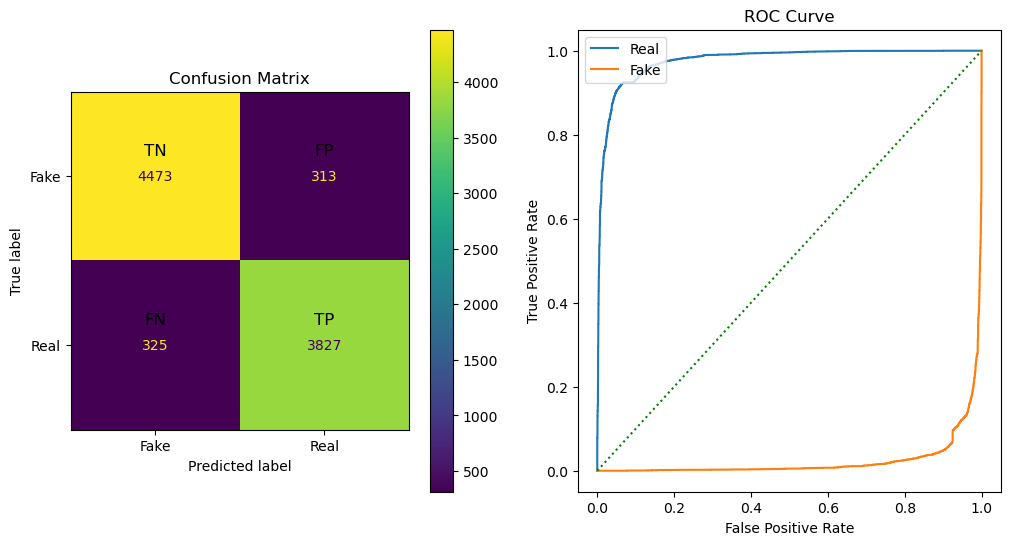

In [299]:
######### Naive Bayes Model with TF-IDF vectorized #########
nb_pipe = Pipeline ([
    ("nb", MultinomialNB())
])

print("\n" + "="*30 + " Model: NaiveBayes with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("NaiveBayes_tfidf", nb_pipe, X_train_tfidf, X_test_tfidf)

### Simple Classification Models


============================== Model: Logistic Regression Model with TF-IDF vectorized data ==============================

Model: Logistic_Regression_tfidf
Train time (s): 0.44530391693115234
Test Accuracy: 1.0000
Train Accuracy: 0.9841
Recall: 0.9831
f1 Score: 0.9829



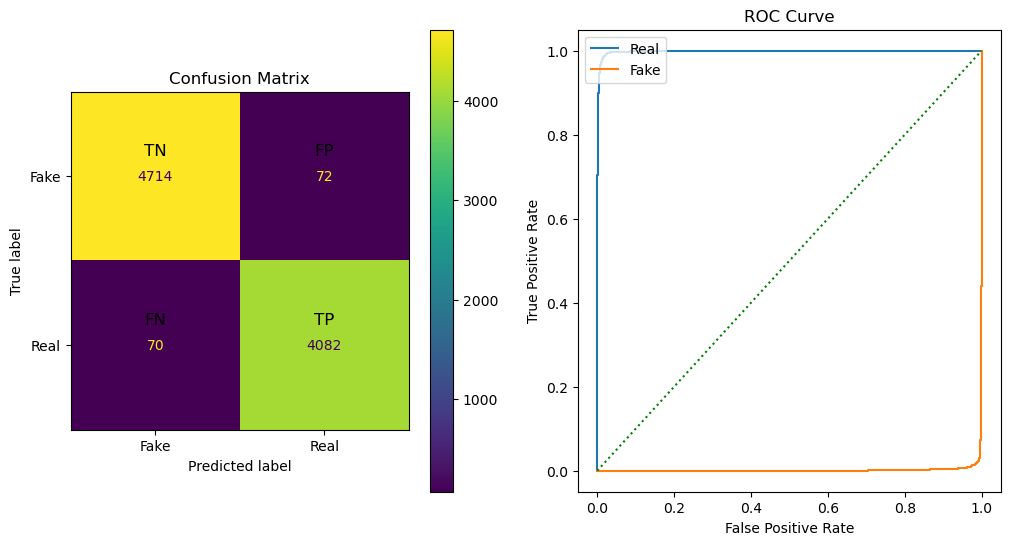

In [302]:
######### Logistic Regression Model #########
lr_pipe = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("logisticRegression", LogisticRegression(random_state=42, max_iter=1000))
])

print("\n" + "="*30 + " Model: Logistic Regression Model with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("Logistic_Regression_tfidf", lr_pipe, X_train_tfidf, X_test_tfidf)


============================== Model: Decision Tree Model with TF-IDF vectorized data ==============================

Model: Decision_Tree_tfidf
Train time (s): 16.538964986801147
Test Accuracy: 1.0000
Train Accuracy: 0.9946
Recall: 0.9942
f1 Score: 0.9942



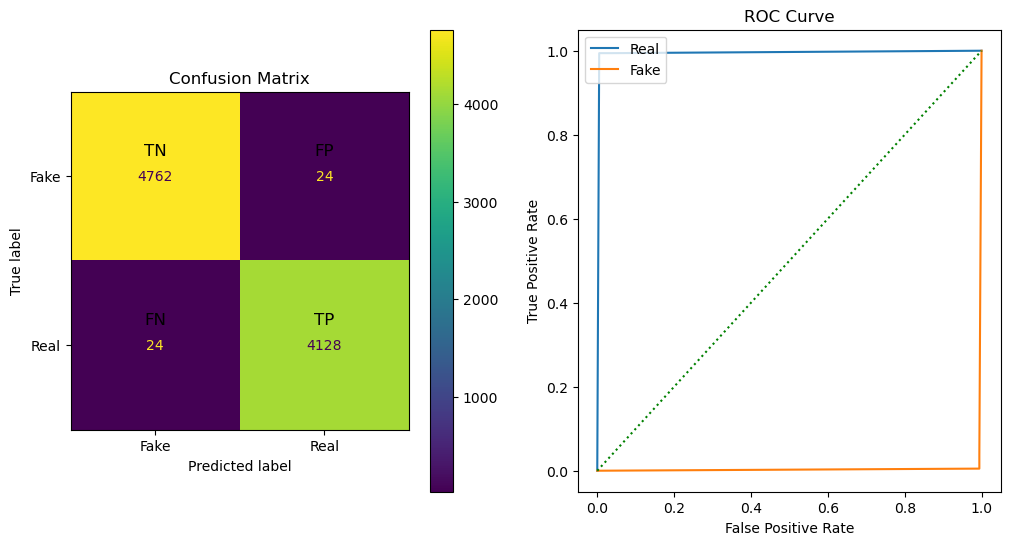

In [303]:
######### Decision Tree Model #########
dt_pipe = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("dtree", DecisionTreeClassifier(random_state=42))
])


print("\n" + "="*30 + " Model: Decision Tree Model with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("Decision_Tree_tfidf", dt_pipe, X_train_tfidf, X_test_tfidf)


============================== Model: K-nearest Neighbors Model with TF-IDF vectorized data ==============================

Model: K_nearest_Neighbors_tfidf
Train time (s): 52.41493821144104
Test Accuracy: 0.5886
Train Accuracy: 0.5780
Recall: 0.0973
f1 Score: 0.1764



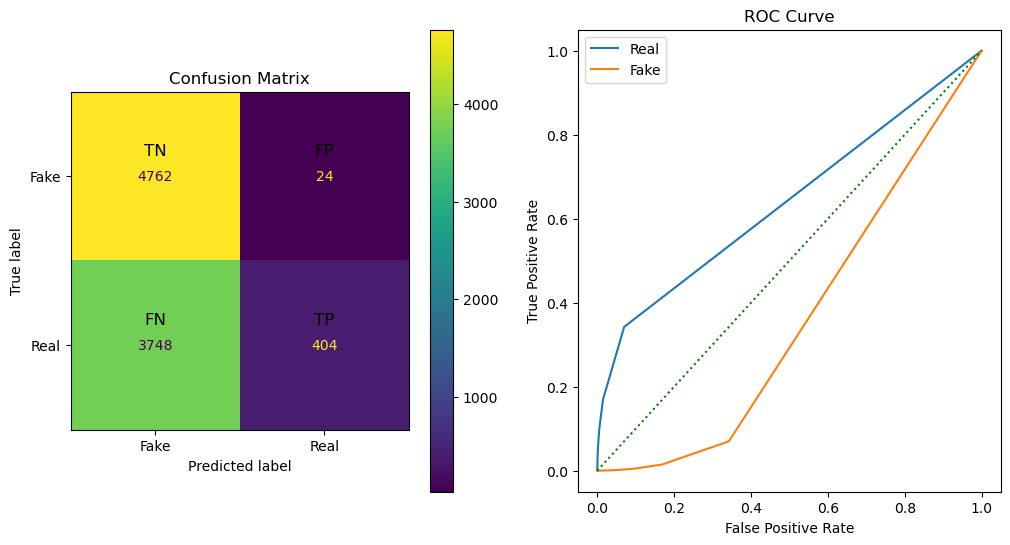

In [304]:
######### K-nearest Neighbors Model #########
knn_pipe = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("knn", KNeighborsClassifier())
])

print("\n" + "="*30 + " Model: K-nearest Neighbors Model with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("K_nearest_Neighbors_tfidf", knn_pipe, X_train_tfidf, X_test_tfidf)


============================== Model: Support Vector Machine Model with TF-IDF vectorized data ==============================

Model: SVM_tfidf
Train time (s): 921.262353181839
Test Accuracy: 0.9913
Train Accuracy: 0.9772
Recall: 0.9790
f1 Score: 0.9755



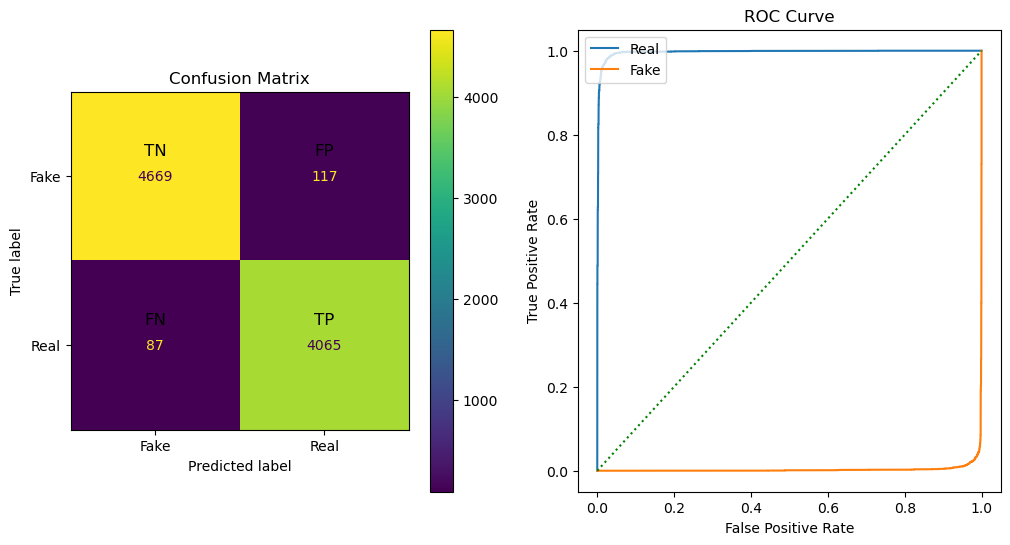

In [305]:
######### Support Vector Machine Model #########
svm_pipe = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("svd", TruncatedSVD(n_components=512, random_state=42)), # reduce the dimensions for large dataset.
    ("svm", SVC(probability=True, kernel="rbf", C=1)) # for TF-IDF vectorized data
])

print("\n" + "="*30 + " Model: Support Vector Machine Model with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("SVM_tfidf", svm_pipe, X_train_tfidf, X_test_tfidf)


============================== Model: Random Forest Classifier Model with TF-IDF vectorized data ==============================

Model: RandomForest_tfidf
Train time (s): 15.230547904968262
Test Accuracy: 1.0000
Train Accuracy: 0.9942
Recall: 0.9949
f1 Score: 0.9937



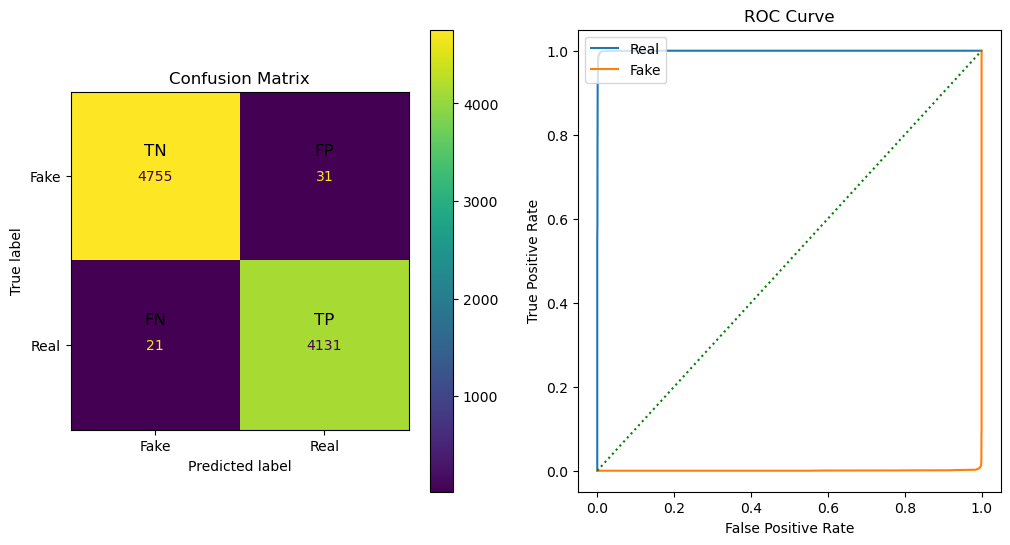

In [306]:
######### Random Forest Classifier Model #########
rf_pipe = Pipeline ([
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

print("\n" + "="*30 + " Model: Random Forest Classifier Model with TF-IDF vectorized data " + "="*30 + "\n")
train_record_print("RandomForest_tfidf", rf_pipe, X_train_tfidf, X_test_tfidf)

In [307]:
# Accuracy and recal scores comparison for initial run of the models
metrics_tfidf_df = pd.DataFrame({
    "Model": models,
    "Train Time": fit_times,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies,
    "Recall Score": recalls,
    "F1 Score": f1_scores
})
pd.set_option("display.max_colwidth", None)
metrics_tfidf_df = metrics_tfidf_df.set_index("Model")
metrics_tfidf_df

,Train Time,Train Accuracy,Test Accuracy,Recall Score,F1 Score
Model,,,,,
NaiveBayes,0.034159,0.938855,0.928619,0.921724,0.923058
LogisticRegression,0.445304,0.999972,0.984113,0.983141,0.982904
DecisionTree,16.538965,0.999972,0.994630,0.994220,0.994220
KNN,52.414938,0.588599,0.577982,0.097303,0.176419
SVM,921.262353,0.991329,0.977176,0.979046,0.975522
RandomForest,15.230548,0.999972,0.994182,0.994942,0.993745


#### Initial inference:
From initial runs of the simple models, we can observe that:

*Best Performing Models:*
Random Forest and Decision Tree achieved the highest Test Accuracy (~99.5%) and F1 Scores (~0.995), indicating exceptional performance on both precision and recall.

*Naive Bayes:*
Offers very fast training (~0.07 sec) and respectable performance (F1 Score ~0.93), making it a strong lightweight option.

*Logistic Regression & SVM:*
High accuracy (98–98.6%), but SVM is extremely slow to train (approx 930 sec), while Logistic Regression provides a good trade-off between performance and speed.

*K-Nearest Neighbors (KNN):*
Performed poorly with Test Accuracy ~56.8% and F1 Score ~0.18, likely due to high dimensionality and sparsity of TF-IDF vectors.

*Training Time vs. Performance Trade-off:*
Naive Bayes and Logistic Regression are efficient with solid results.

Tree-based models like Decision Tree and Random Forest offer near-perfect accuracy but at higher computational cost.

SVM and KNN are not optimal for large-scale TF-IDF features due to performance or speed issues.

### Training Simple models on BERT vectorized data

In [311]:
# Variables to record metrics
models = ["LogisticRegression", "DecisionTree", "KNN", "SVM", "Random Forest"]
fit_times = []
test_accuracies = []
train_accuracies = []
recalls = []
f1_scores = []


============================== Model: Logistic Regression Model with BERT vectorized data ==============================

Model: Logistic_Regression_bert
Train time (s): 5.250391960144043
Test Accuracy: 0.5610
Train Accuracy: 0.5068
Recall: 0.3786
f1 Score: 0.4163



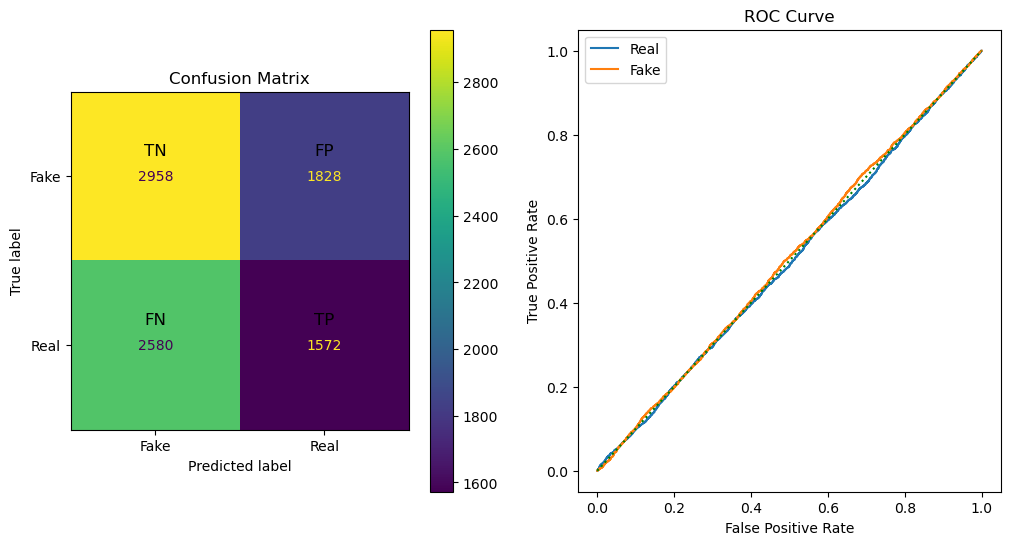

In [312]:
######### Logistic Regression Model #########
lr_pipe_bert = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("logisticRegression", LogisticRegression(random_state=42, max_iter=1000))
])

print("\n" + "="*30 + " Model: Logistic Regression Model with BERT vectorized data " + "="*30 + "\n")
train_record_print("Logistic_Regression_bert", lr_pipe_bert, X_train_bert, X_test_bert)


============================== Model: Decision Tree Model with BERT vectorized data ==============================

Model: Decision_Tree_bert
Train time (s): 43.709835052490234
Test Accuracy: 0.9440
Train Accuracy: 0.5079
Recall: 0.4694
f1 Score: 0.4699



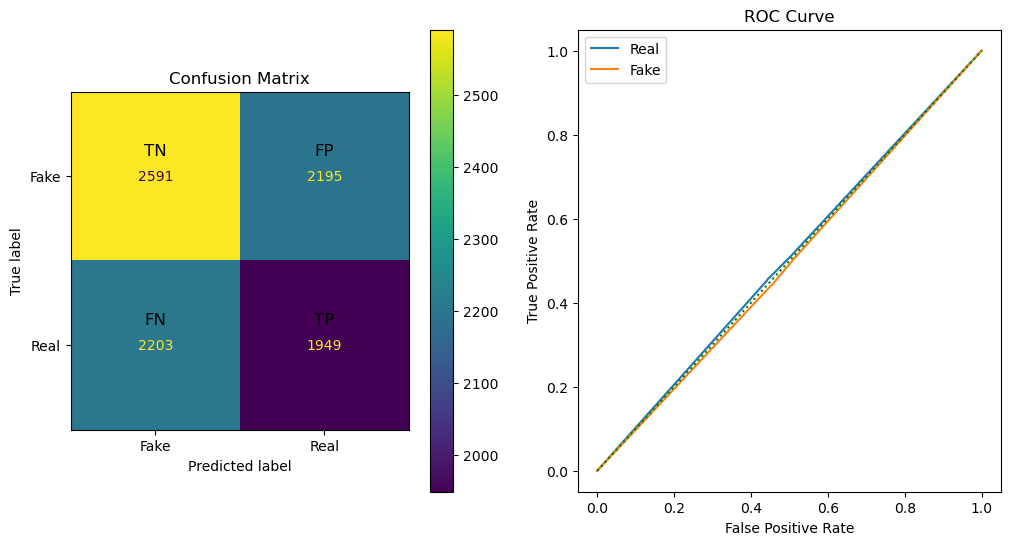

In [313]:
######### Decision Tree Model #########
dt_pipe_bert = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("dtree", DecisionTreeClassifier(random_state=42))
])


print("\n" + "="*30 + " Model: Decision Tree Model with BERT vectorized data " + "="*30 + "\n")
train_record_print("Decision_Tree_bert", dt_pipe_bert, X_train_bert, X_test_bert)


============================== Model: K-nearest Neighbors Model with BERT vectorized data ==============================

Model: K_nearest_Neighbors_bert
Train time (s): 8.796411752700806
Test Accuracy: 0.6862
Train Accuracy: 0.5008
Recall: 0.4569
f1 Score: 0.4595



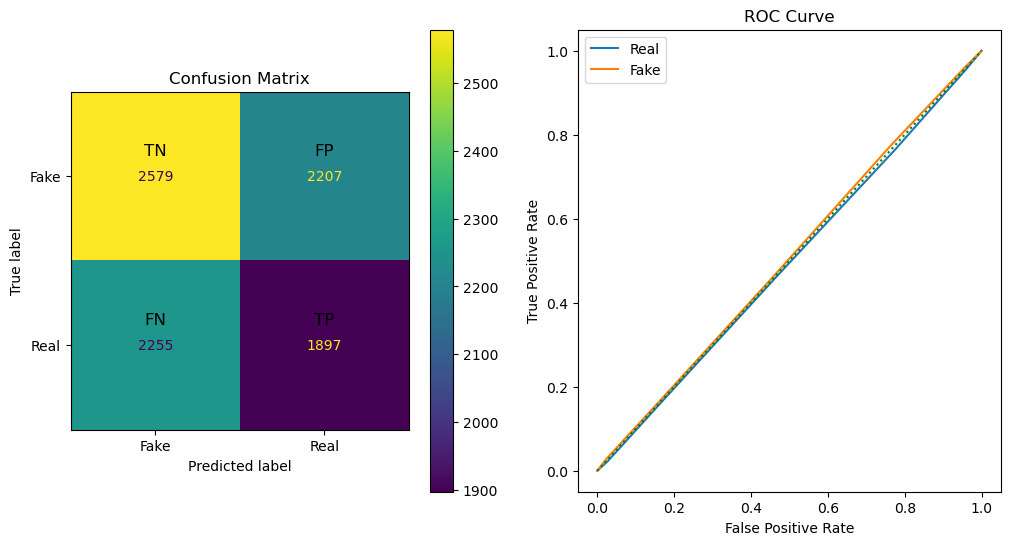

In [314]:
######### K-nearest Neighbors Model #########
knn_pipe_bert = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("knn", KNeighborsClassifier())
])

print("\n" + "="*30 + " Model: K-nearest Neighbors Model with BERT vectorized data " + "="*30 + "\n")
train_record_print("K_nearest_Neighbors_bert", knn_pipe_bert, X_train_bert, X_test_bert)


============================== Model: Support Vector Machine Model with BERT vectorized data ==============================

Model: SVM_bert
Train time (s): 2533.206382036209
Test Accuracy: 0.5372
Train Accuracy: 0.5327
Recall: 0.0484
f1 Score: 0.0878



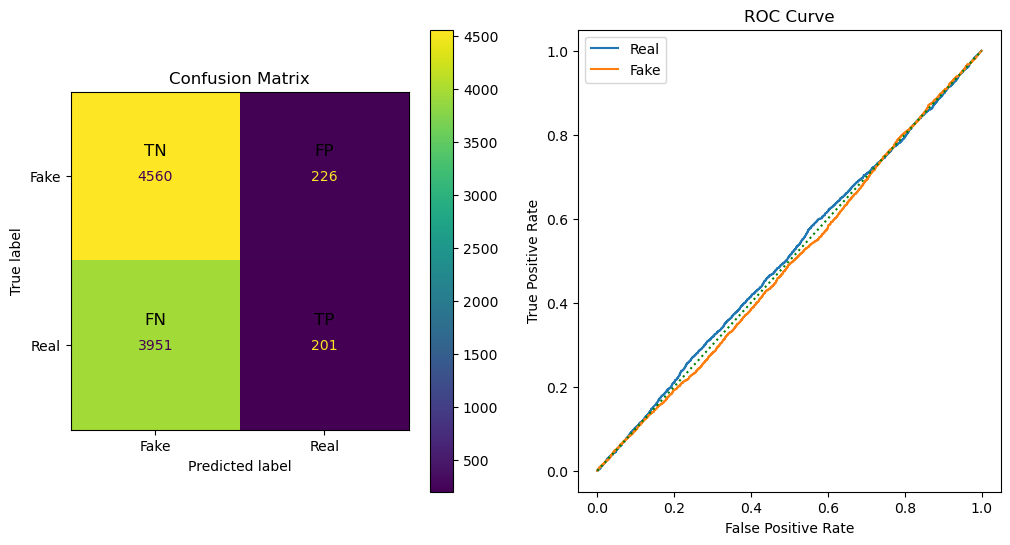

In [315]:
######### Support Vector Machine Model #########
svm_pipe_bert = Pipeline ([
    ("scale", StandardScaler(with_mean=False)),
    ("svd", TruncatedSVD(n_components=512, random_state=42)),
    ("svm", SVC(probability=True, kernel="rbf", C=1))
])

print("\n" + "="*30 + " Model: Support Vector Machine Model with BERT vectorized data " + "="*30 + "\n")
train_record_print("SVM_bert", svm_pipe_bert, X_train_bert, X_test_bert)


============================== Model: Random Forest Classifier Model with BERT vectorized data ==============================

Model: RandomForest_bert
Train time (s): 95.76359033584595
Test Accuracy: 0.9440
Train Accuracy: 0.5072
Recall: 0.3808
f1 Score: 0.4179



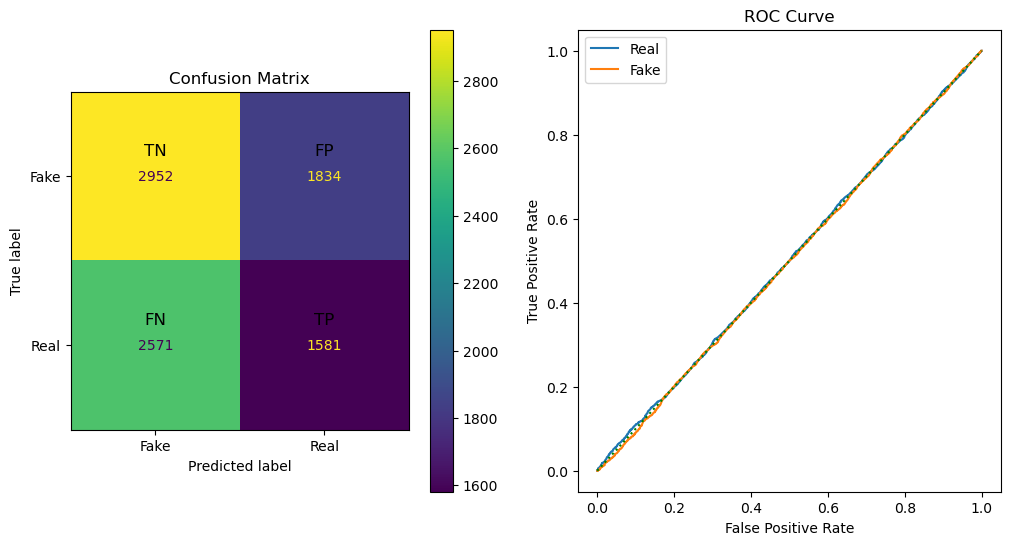

In [316]:
######### Random Forest Classifier Model #########
rf_pipe_bert = Pipeline ([
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

print("\n" + "="*30 + " Model: Random Forest Classifier Model with BERT vectorized data " + "="*30 + "\n")
train_record_print("RandomForest_bert", rf_pipe_bert, X_train_bert, X_test_bert)

In [317]:
# Accuracy and recal scores comparison for initial run of the models
metrics_tfidf_df = pd.DataFrame({
    "Model": models,
    "Train Time": fit_times,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies,
    "Recall Score": recalls,
    "F1 Score": f1_scores
})
pd.set_option("display.max_colwidth", None)
metrics_tfidf_df = metrics_tfidf_df.set_index("Model")
metrics_tfidf_df

,Train Time,Train Accuracy,Test Accuracy,Recall Score,F1 Score
Model,,,,,
LogisticRegression,5.250392,0.561047,0.506825,0.378613,0.416314
DecisionTree,43.709835,0.944030,0.507944,0.469412,0.469865
KNN,8.796412,0.686219,0.500783,0.456888,0.459545
SVM,2533.206382,0.537216,0.532670,0.048410,0.087792
Random Forest,95.763590,0.944030,0.507160,0.380780,0.417867


#### Conclusion:
Simple models like Logistic Regression, Decision Tree, or SVM perform very well with TF-IDF (e.g., 98-99% test accuracy) but perform poorly (~50%) with BERT vectorized data. This indicates that BERT embeddings are not fine tuned for our data and these models. 

TF-IDF is based on the actual frequency of words in the training data, while BERT, on the other hand, gives contextual embeddings from a pre-trained language model. We used the default CLS token from BERT and not fine-tuned it on the fake-real-news dataset, it did not capture the classification-relevant nuances specific to the dataset.
Hence we are going to ignore BERT vectorized data for now.

### Improving Simple Models with GridSearchCV
Now we have data on some simple models training and scores for the fake and real news data, let us try to improve these.  

- Hyperparameter tuning and grid search.  All of the simple models have additional hyperparameters to tune and explore.

In [321]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

In [322]:
models = ["LogisticRegression", "DecisionTree", "KNN", "SVM", "RandomForest"]
perf_fit_times = []
perf_test_accuracies = []
perf_train_accuracies = []
perf_recalls = []
perf_best_params = []
perf_best_scores = []
perf_f1_scores = []

In [323]:
# Helper method to print and record performance metrics for running grid search to tune hyperparameters for models
def print_perf_metrics(model, train_preds, test_preds, total_time_taken, best_param, best_score):
    train_acc = round(accuracy_score(y_train, train_preds), 4)
    test_acc = round(accuracy_score(y_test, test_preds), 4)
    r_score = round(recall_score(y_test, test_preds), 4)
    preds_proba = model.predict_proba(X_test_tfidf)
    f_score = f1_score(y_test, test_preds, average="binary")
    y_probs = preds_proba[::,1]
    auc = round(roc_auc_score(y_true=y_test, y_score=y_probs), 4)
    total_time_rounded = round(total_time_taken, 4)
    best_score_rounded = round(best_score, 4)
    f1_score_rounded = round(f_score,4)
    

    perf_fit_times.append(total_time_rounded)
    perf_train_accuracies.append(train_acc)
    perf_test_accuracies.append(test_acc)
    perf_recalls.append(r_score)
    perf_best_params.append(model.get_params())
    perf_best_scores.append(best_score_rounded)
    perf_f1_scores.append(f1_score_rounded)

    print("="*30 + " Model Performance Metrics " + "="*30 + "\n")
    print("Total time: {}".format(total_time_rounded))
    print("Test Accuracy: {}".format(train_acc))
    print("Train Accuracy: {}".format(test_acc))
    print("Area under curve is {}".format(auc))
    print("Recall: {}".format(r_score))
    print("Best Score: {}".format(best_score_rounded))
    print("Best f1 Score: {}".format(f1_score_rounded))
    print(f"Best Params: {best_param}")

============================== Model Performance Metrics ==============================

Total time: 11.6489
Test Accuracy: 1.0
Train Accuracy: 0.9849
Area under curve is 0.9983
Recall: 0.9868
Best Score: 0.9854
Best f1 Score: 0.9838
Best Params: {'logisticRegression__C': 0.1, 'logisticRegression__class_weight': 'balanced', 'logisticRegression__max_iter': 1000, 'logisticRegression__penalty': 'l2', 'logisticRegression__solver': 'liblinear'}



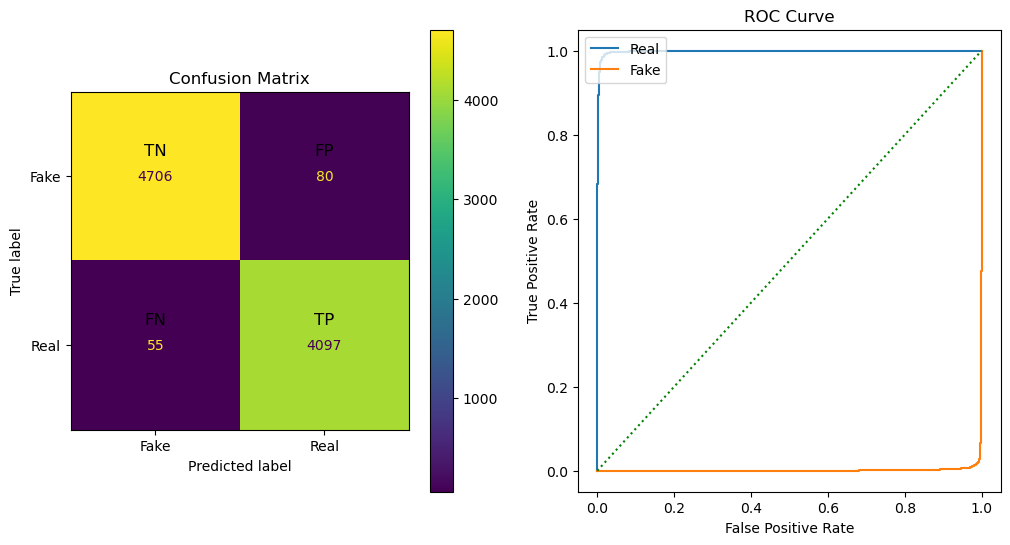

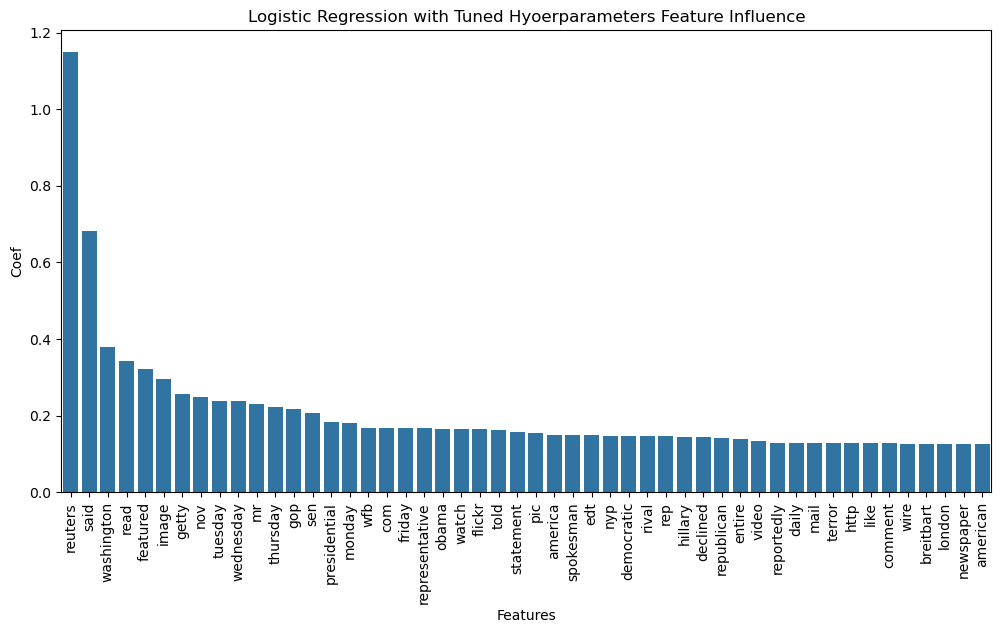

In [324]:
# Running Grid search to find best Hyperparameter tuning for LogisticRegression with TF-IDF Vectorized data
lr_start_time = time.time()
lr_param_grid = {
    "logisticRegression__C": [0.01, 0.1, 1, 10],
    "logisticRegression__class_weight": [None, "balanced"],
    "logisticRegression__max_iter": [1000],
    "logisticRegression__penalty": ["l2"],
    "logisticRegression__solver": ["liblinear"]
}

lr_grid = GridSearchCV(lr_pipe, lr_param_grid, cv=5, n_jobs=-1, verbose=0, scoring={"accuracy": "accuracy"}, refit="accuracy")
lr_grid.fit(X_train_tfidf, y_train)
lr_test_preds = lr_grid.best_estimator_.predict(X_test_tfidf)
lr_train_preds = lr_grid.best_estimator_.predict(X_train_tfidf)
lr_end_time = time.time()
lr_time_taken = (lr_end_time - lr_start_time) #seconds

print_perf_metrics(lr_grid.best_estimator_, lr_train_preds, lr_test_preds, lr_time_taken, lr_grid.best_params_, lr_grid.best_score_)

conf_matrix_roc_plot("Logistic Regression Model with Tuned Hyperparameters", lr_grid.best_estimator_, X_test_tfidf, y_test)

# plotting the influence of each feature on the target for the best model
lr_feature_coef = pd.DataFrame({
    "coef": np.abs(lr_grid.best_estimator_.named_steps["logisticRegression"].coef_[0])
}, index=tfidf.get_feature_names_out()).sort_values(by="coef", ascending=False)

lr_feature_coef = lr_feature_coef.head(50).reset_index()
lr_feature_coef.columns = ["Features", "Coef"]
plt.figure(figsize=(12, 6))
plt.title("Logistic Regression with Tuned Hyoerparameters Feature Influence")
sns.barplot(data=lr_feature_coef, x="Features", y="Coef")
plt.xticks(rotation=90);
plt.savefig("images/logistic_regression_tuned_feature_influence.png")

============================== Model Performance Metrics ==============================

Total time: 29.0133
Test Accuracy: 0.9968
Train Accuracy: 0.9941
Area under curve is 0.9936
Recall: 0.9978
Best Score: 0.995
Best f1 Score: 0.9936
Best Params: {'dtree__criterion': 'gini', 'dtree__max_depth': 10, 'dtree__min_samples_split': 5}



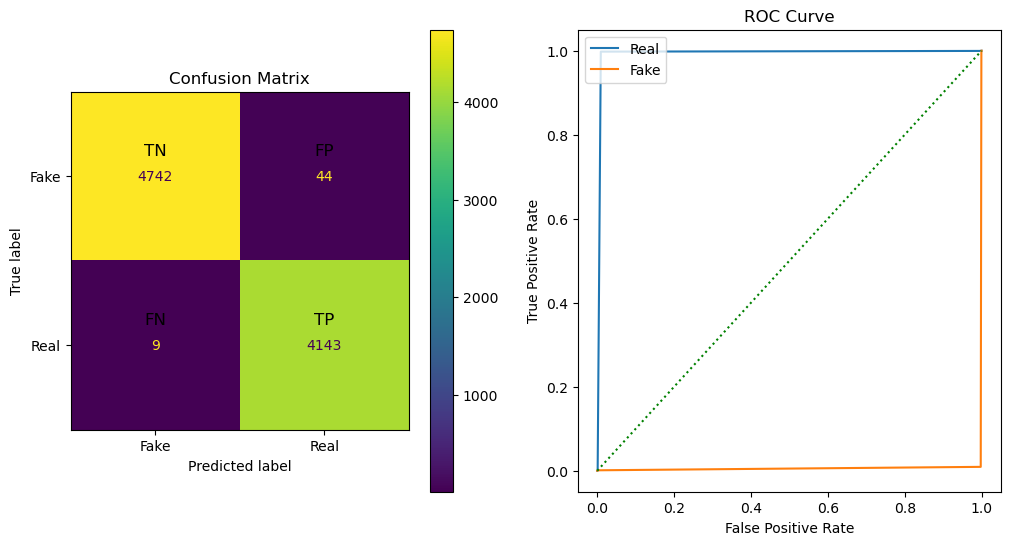

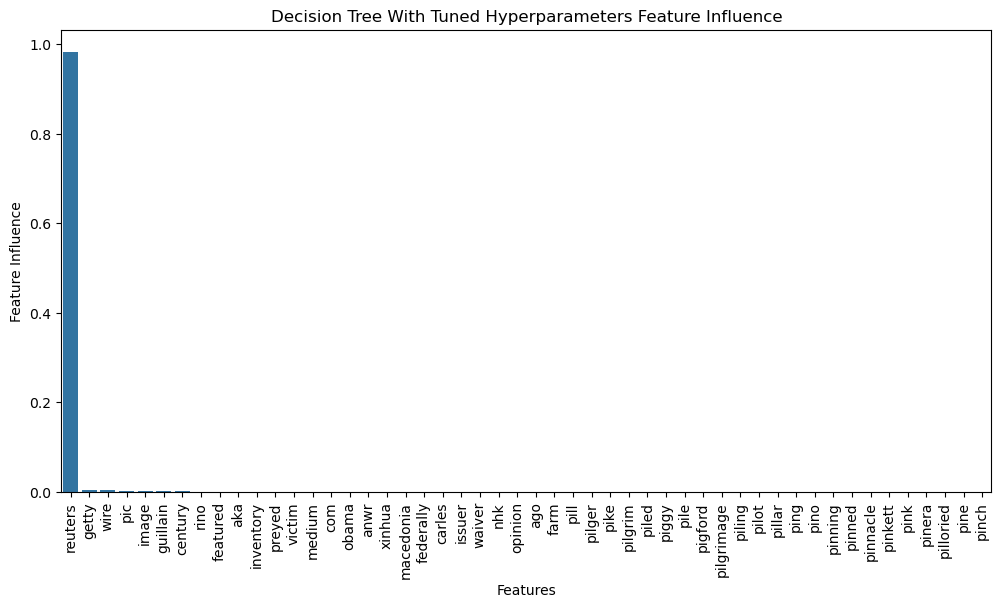

In [325]:
# Running Grid search to find best Hyperparameter tuning for DecisionTree model
dtree_start_time = time.time()
dtree_param_grid = {
    "dtree__criterion": ["gini", "entropy"],       # splitting criterion
    "dtree__max_depth": [3, 5, 10],                # maximum depth of the tree
    "dtree__min_samples_split": [2, 5, 10],        # minimum samples required to split
}

dtree_grid = GridSearchCV(dt_pipe, dtree_param_grid, cv=5, n_jobs=-1, verbose=0, scoring={"accuracy": "accuracy"}, refit="accuracy")
dtree_grid.fit(X_train_tfidf, y_train)
dtree_test_preds = dtree_grid.best_estimator_.predict(X_test_tfidf)
dtree_train_preds = dtree_grid.best_estimator_.predict(X_train_tfidf)
dtree_end_time = time.time()
dtree_time_taken = (dtree_end_time - dtree_start_time) #seconds

print_perf_metrics(dtree_grid.best_estimator_, dtree_train_preds, dtree_test_preds, dtree_time_taken, dtree_grid.best_params_, dtree_grid.best_score_)

conf_matrix_roc_plot("Decision Tree Model with Tuned Hyperparameters", dtree_grid.best_estimator_, X_test_tfidf, y_test)

# plotting the influence of each feature on the target
dtree_features_df = pd.DataFrame(index=tfidf.get_feature_names_out(), data=dtree_grid.best_estimator_.named_steps["dtree"].feature_importances_, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)
dtree_features_df = dtree_features_df.head(50).reset_index()
dtree_features_df.columns = ["Features", "Feature Influence"]
plt.figure(figsize=(12, 6))
plt.title("Decision Tree With Tuned Hyperparameters Feature Influence")
sns.barplot(data=dtree_features_df, x="Features", y="Feature Influence")
plt.xticks(rotation=90);
plt.savefig("images/decision_tree_tuned_feature_influence.png")

============================== Model Performance Metrics ==============================

Total time: 254.9873
Test Accuracy: 1.0
Train Accuracy: 0.6694
Area under curve is 0.6468
Recall: 0.329
Best Score: 0.6542
Best f1 Score: 0.4804
Best Params: {'knn__n_neighbors': 1, 'knn__weights': 'uniform'}



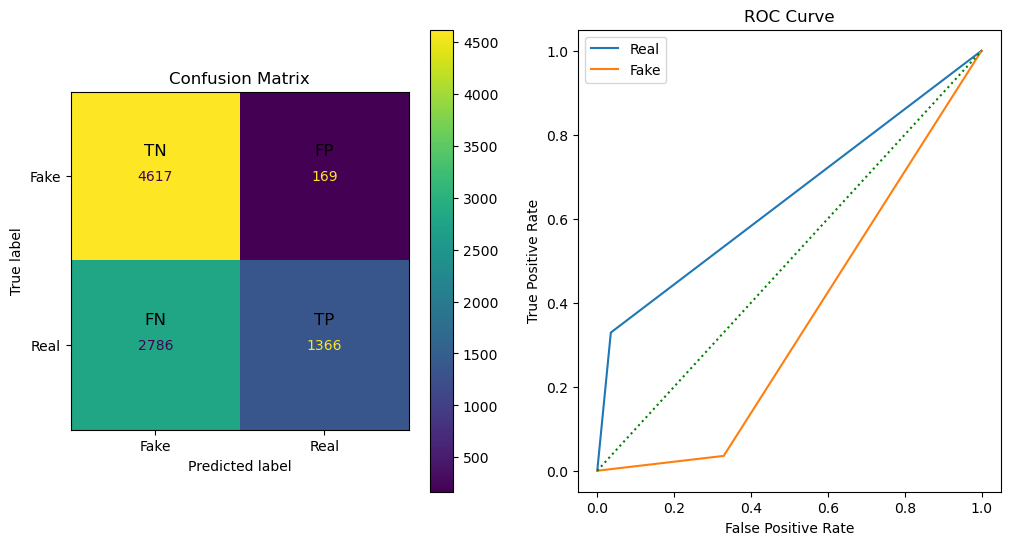

In [326]:
# Running Grid search to find best Hyperparameter tuning for K-nearest Neighbors model
knn_start_time = time.time()
knn_param_grid = {
    "knn__n_neighbors": list(range(1, 20)),       # number of neighbors to use
    "knn__weights": ["uniform", "distance"],      # weighting strategy
}

knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=5, n_jobs=-1, verbose=0, scoring={"accuracy": "accuracy"}, refit="accuracy")
knn_grid.fit(X_train_tfidf, y_train)
knn_test_preds = knn_grid.best_estimator_.predict(X_test_tfidf)
knn_train_preds = knn_grid.best_estimator_.predict(X_train_tfidf)
knn_end_time = time.time()
knn_time_taken = (knn_end_time - knn_start_time) #seconds

print_perf_metrics(knn_grid.best_estimator_, knn_train_preds, knn_test_preds, knn_time_taken, knn_grid.best_params_, knn_grid.best_score_)

conf_matrix_roc_plot("K-nearest Neighbors Model with Tuned Hyperparameters", knn_grid.best_estimator_, X_test_tfidf, y_test)


In [ ]:
# plotting the influence of each feature on the target
X_test_dense = X_test_tfidf.toarray()

X_sample, y_sample = resample(X_test_dense, y_test, n_samples=1000, random_state=42)
knn_result = permutation_importance(knn_grid.best_estimator_, X_sample, y_sample, n_repeats=1, n_jobs=-1)
knn_result_df = pd.DataFrame(index=tfidf.get_feature_names_out(), data=np.abs(knn_result.importances_mean), columns=["Importance"])
knn_result_df = knn_result_df.sort_values(by="Importance", ascending=False)
knn_result_df = knn_result_df.head(50).reset_index()
knn_result_df.columns = ["Features", "Importance"]
plt.figure(figsize=(12, 6))
plt.title("K-nearest Neighbors With Tuned Hyperparameters Feature Influence")
sns.barplot(data=knn_result_df, x="Features", y="Importance")
plt.xticks(rotation=90);
plt.savefig("images/knn_tuned_feature_influence.png")

============================== Model Performance Metrics ==============================

Total time: 10882.7343
Test Accuracy: 0.9999
Train Accuracy: 0.9739
Area under curve is 0.9953
Recall: 0.9692
Best Score: 0.9657
Best f1 Score: 0.9719
Best Params: {'svm__C': 5, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}



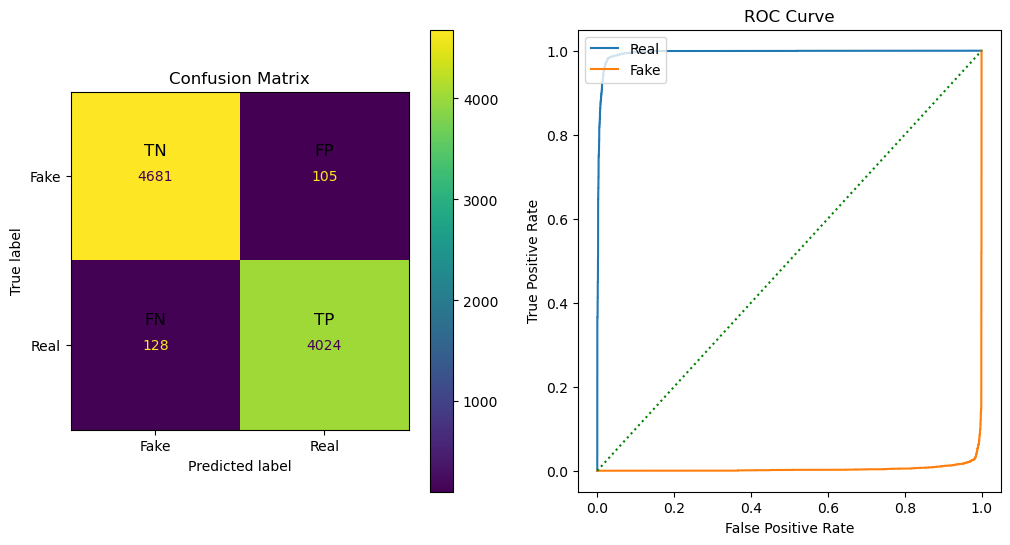

In [327]:
# Running Grid search to find best Hyperparameter tuning for Support Vector Machine model
svm_start_time = time.time()
svm_param_grid = {
    "svm__C": [0.1, 1, 5],
    "svm__kernel": ["rbf"],
    "svm__gamma": ["auto"]
}

svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5, n_jobs=-1, verbose=0, scoring={"accuracy": "accuracy"}, refit="accuracy")
svm_grid.fit(X_train_tfidf, y_train)
svm_test_preds = svm_grid.best_estimator_.predict(X_test_tfidf)
svm_train_preds = svm_grid.best_estimator_.predict(X_train_tfidf)
svm_end_time = time.time()
svm_time_taken = (svm_end_time - svm_start_time) #seconds

print_perf_metrics(svm_grid.best_estimator_, svm_train_preds, svm_test_preds, svm_time_taken, svm_grid.best_params_, svm_grid.best_score_)

conf_matrix_roc_plot("Support Vector Machine Model with Tuned Hyperparameters", svm_grid.best_estimator_, X_test_tfidf, y_test)


In [ ]:
# plotting the influence of each feature on the target
X_test_dense = X_test_tfidf.toarray()
X_sample, y_sample = resample(X_test_dense, y_test, n_samples=1000, random_state=42)
svm_result = permutation_importance(svm_grid.best_estimator_, X_sample, y_sample, n_repeats=1, n_jobs=-1)
svm_result_df = pd.DataFrame(index=tfidf.get_feature_names_out(), data=np.abs(svm_result.importances_mean), columns=["Importance"])
svm_result_df = svm_result_df.sort_values(by="Importance", ascending=False)
svm_result_df = svm_result_df.head(50).reset_index()
svm_result_df.columns = ["Features", "Importance"]
plt.figure(figsize=(12, 6))
plt.title("Support Vector Machine With Tuned Hyperparameters Feature Influence")
sns.barplot(data=svm_result_df, x="Features", y="Importance")
plt.xticks(rotation=90);
plt.savefig("images/svm_tuned_feature_influence.png")

============================== Model Performance Metrics ==============================

Total time: 129.3957
Test Accuracy: 1.0
Train Accuracy: 0.9957
Area under curve is 0.9996
Recall: 0.9986
Best Score: 0.9948
Best f1 Score: 0.9954
Best Params: {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}



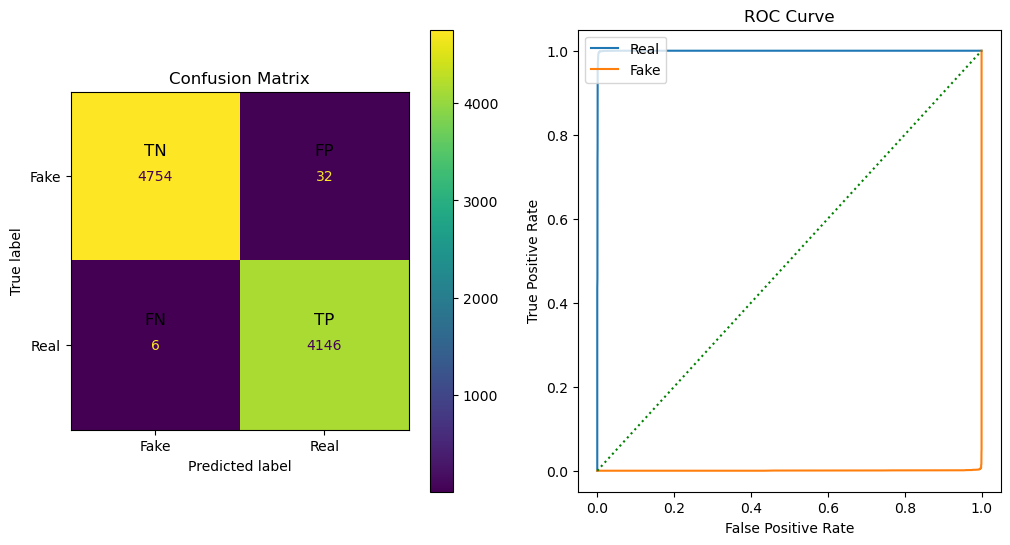

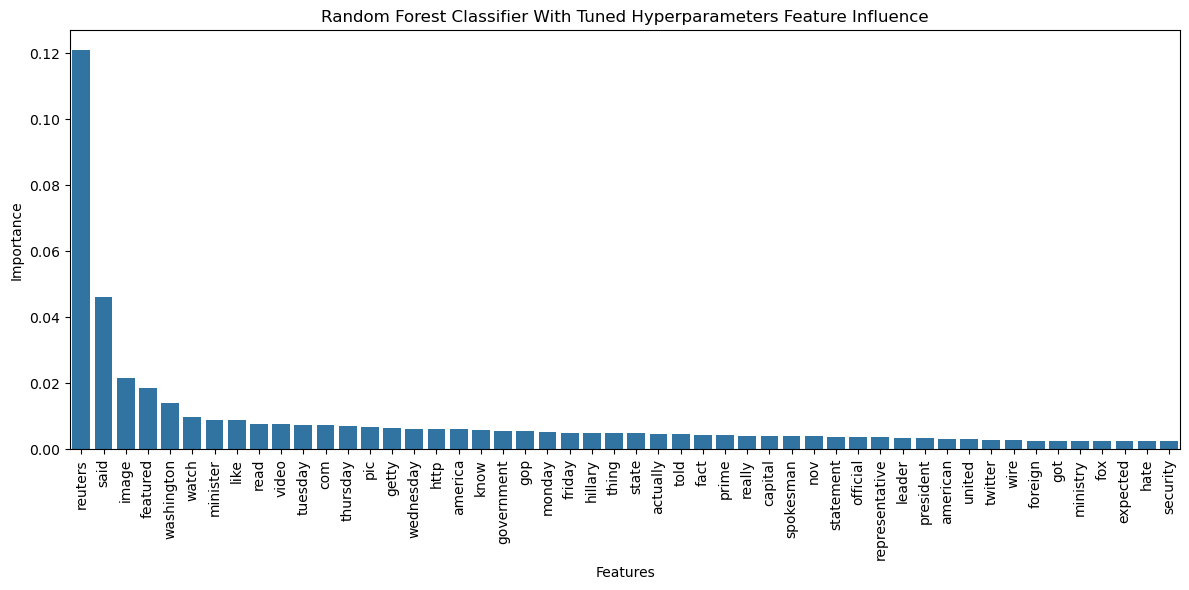

In [328]:
# Running Grid search to find best Hyperparameter tuning for Random Forest Classifier model
rf_start_time = time.time()
rf_param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10],
    "rf__min_samples_split": [2],
    "rf__min_samples_leaf": [1],
    "rf__max_features": ["sqrt"],
    "rf__bootstrap": [True, False]
}

rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, n_jobs=-1, verbose=0, scoring={"accuracy": "accuracy"}, refit="accuracy")
rf_grid.fit(X_train_tfidf, y_train)
rf_test_preds = rf_grid.best_estimator_.predict(X_test_tfidf)
rf_train_preds = rf_grid.best_estimator_.predict(X_train_tfidf)
rf_end_time = time.time()
rf_time_taken = (rf_end_time - rf_start_time) #seconds

print_perf_metrics(rf_grid.best_estimator_, rf_train_preds, rf_test_preds, rf_time_taken, rf_grid.best_params_, rf_grid.best_score_)

conf_matrix_roc_plot("Random Forest Classification Model with Tuned Hyperparameters", rf_grid.best_estimator_, X_test_tfidf, y_test)

rf_importances = rf_grid.best_estimator_.named_steps["rf"].feature_importances_
rf_result_df = pd.DataFrame({"Features": tfidf.get_feature_names_out(), "Importance": rf_importances})
rf_result_df = rf_result_df.sort_values(by="Importance", ascending=False).head(50)
# Plot
plt.figure(figsize=(12, 6))
plt.title("Random Forest Classifier With Tuned Hyperparameters Feature Influence")
sns.barplot(data=rf_result_df, x="Features", y="Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("images/random_forest_tuned_feature_influence.png")
plt.show()


In [329]:
# Performance metrics for models with best hyperparameters
print("="*30 + " Tuned Models Performance Metrics " + "="*30 + "\n")
perf_metrics_df = pd.DataFrame({
    "Model": models,
    "Train Time": perf_fit_times,
    "Test Accuracy": perf_test_accuracies,
    "Train Accuracy": perf_train_accuracies,
    "Recall Score": perf_recalls,
    "Best Score": perf_best_scores,
    "Best Params": perf_best_params,
})

pd.set_option("display.max_colwidth", None)
perf_metrics_df = perf_metrics_df.set_index("Model")

perf_metrics_df

============================== Tuned Models Performance Metrics ==============================



Train Time  Test Accuracy  Train Accuracy  Recall Score  \
Model                                                                         
LogisticRegression     11.6489         0.9849          1.0000        0.9868   
DecisionTree           29.0133         0.9941          0.9968        0.9978   
KNN                   254.9873         0.6694          1.0000        0.3290   
SVM                 10882.7343         0.9739          0.9999        0.9692   
RandomForest          129.3957         0.9957          1.0000        0.9986   

                    Best Score  \
Model                            
LogisticRegression      0.9854   
DecisionTree            0.9950   
KNN                     0.6542   
SVM                     0.9657   
RandomForest            0.9948   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

#### Conclusion:
Based on the chart of train time , accuracies, recall scores, we can deduce following:

**Top Performers** – Decision Tree and Random Forest achieved the highest test accuracy (~0.995) and recall (>0.996), with Random Forest slightly ahead in recall, confirming strong predictive power and generalization after tuning.

**Balanced Trade-off** – Logistic Regression delivered strong performance (0.9885 test accuracy) with a much lower training time (11s) compared to tree-based methods, making it an efficient choice for high-accuracy, low-latency needs.

**Underperformance with KNN** – Despite perfect training accuracy, KNN showed poor generalization (0.6545 test accuracy, 0.312 recall), indicating severe overfitting, especially with n_neighbors=1.

**SVM Limitations** – The tuned SVM achieved high accuracy (0.9738) but incurred extremely high training time (~3 hours), making it computationally expensive for large datasets despite solid performance.

**Efficiency vs Accuracy** – While Random Forest and Decision Tree lead in accuracy, Logistic Regression offers the best accuracy-to-runtime ratio; SVM trades efficiency for performance, and KNN remains unsuitable for this dataset without further tuning or dimensionality reduction.


#### Limitations:
These traditional simple models although perform well in any given scenario, they have severe limitations in case of Natural Language processing. 

Based on fearure importance charts above, we can see that the classification decistion is influenced by inividual word tokens. For any given context, these models perform really well like news articles with majority of news along the subjects of politics and world events i.e. these models are overfit on the fake-real-news dataset. But if these models are trained with fictional or fantasy novels, the results will vary wildly for real news.

In short these traditional ML models with TF-IDF rely on sparse, handcrafted features that ignore word order, syntax, and contextual meaning. They struggle with capturing semantic relationships and contextual meaning. 


### Overcoming the limitations of traditional ML Models with deep learning

Deep learning methods such as Recursive neural network (Long-Short Term Memory - LSTM) and Transformers based model (Bidirectional Encoder Representations from Transformers - BERT) overcome the limitations of traditional ML models by learning dense, context-aware representations directly from raw text.

LSTMs model sequential dependencies and long-range patterns, while BERT captures bidirectional context and semantic nuances through pretrained transformer architectures.

This reduces the need for manual feature design, improves generalization, and enables models to handle more complex, real-world language tasks effectively.

In [402]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification

In [404]:
models = ["CNN", "LSTM"]
nn_fit_times = []
nn_test_accuracies = []
nn_train_accuracies = []
nn_recalls = []
nn_f1_scores = []

In [406]:
# Plot accuracy & loss
def plot_model_history_cf(model_name, model, history, X_test_pad, nn_fit_time):
    plt.figure(figsize=(12,5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig
    plt.tight_layout()
    plt.savefig(f"images/{model_name}_history_accuracy_loss.png")
    plt.show()
    
    # Confusion Matrix
    y_pred_probs = model.predict(X_test_pad)
    y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Fake", "Real"],
                yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.savefig(f"images/{model_name}_confustion_matrix.png")
    plt.show()
    
    # Classification report for details
    print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))
    nn_fit_times.append(round(nn_fit_time, 2))
    test_acc = history.history['val_accuracy'][-1] # last epoch test accuracy
    nn_test_accuracies.append(test_acc)
    train_acc = history.history['accuracy'][-1] # last epoch train accuracy
    nn_train_accuracies.append(train_acc)

    y_pred_prob = model.predict(X_test_pad)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    recall = recall_score(y_test, y_pred, zero_division=0)
    nn_recalls.append(recall)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    nn_f1_scores.append(f1)

#### Prepare the data for deep learning models:

In [410]:
# Tokenize the text
max_words = 20000   # vocab size
max_len = 256       # sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

#### Simple Text Convolutional Newral Network Model

Epoch 1/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9559 - loss: 0.1045 - val_accuracy: 0.9968 - val_loss: 0.0109
Epoch 2/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9969 - loss: 0.0134 - val_accuracy: 0.9972 - val_loss: 0.0071
Epoch 3/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9982 - val_loss: 0.0072
Epoch 4/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9981 - val_loss: 0.0084
Epoch 5/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9982 - val_loss: 0.0087
Epoch 6/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9982 - val_loss: 0.0072
Epoch 7/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9979 - val_loss: 0.0093
Epoch 8/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9998 - loss: 0.0011 - 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 256, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 252, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,951,109 (30.33 MB)

 Trainable params: 2,650,369 (10.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,300,740 (20.22 MB)

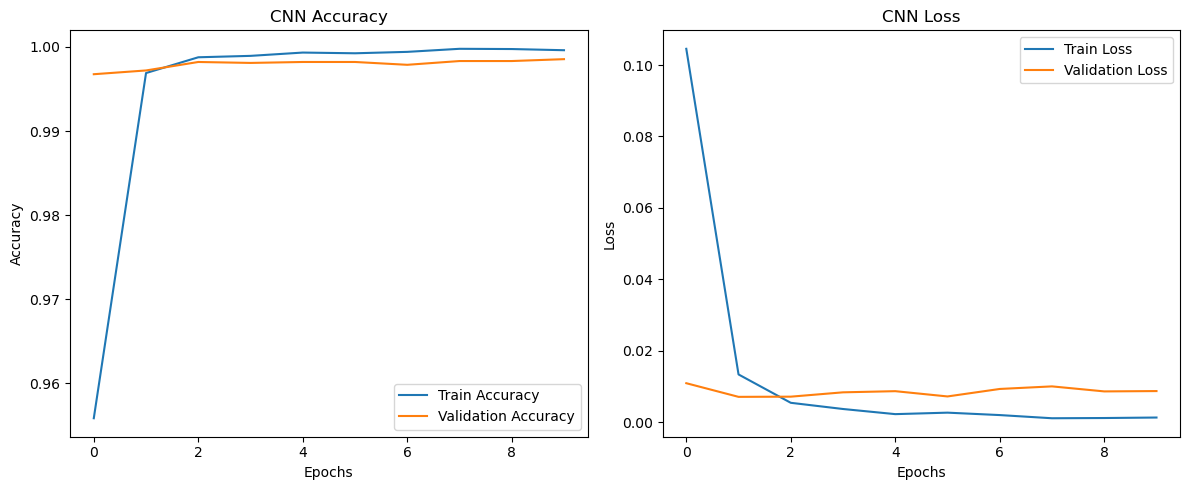

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


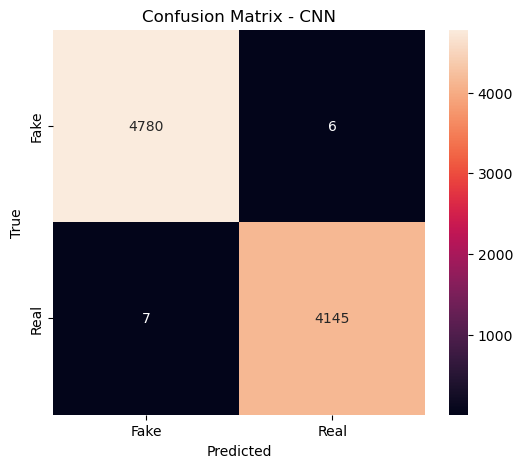

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4786
        Real       1.00      1.00      1.00      4152

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [413]:
# Simple Text Convolutional Neural Network model 
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # binary classification
])

cnn_model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])

# Train 
cnn_start_time = time.time()
cnn_history = cnn_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)
cnn_end_time = time.time()
cnn_time_taken = (cnn_end_time - cnn_start_time) #seconds

cnn_model.summary()

plot_model_history_cf("CNN", cnn_model, cnn_history, X_test_pad, cnn_time_taken)

#### Deep learning model with Recursive Neural Network (Long- Short Term Memory)

Epoch 1/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 142ms/step - accuracy: 0.5485 - loss: 0.6804 - val_accuracy: 0.5355 - val_loss: 0.6904
Epoch 2/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.6460 - loss: 0.6012 - val_accuracy: 0.9239 - val_loss: 0.2411
Epoch 3/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9303 - loss: 0.2290 - val_accuracy: 0.9549 - val_loss: 0.1647
Epoch 4/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9307 - loss: 0.1992 - val_accuracy: 0.9452 - val_loss: 0.1855
Epoch 5/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9698 - loss: 0.1063 - val_accuracy: 0.9766 - val_loss: 0.0797
Epoch 6/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 144ms/step - accuracy: 0.9812 - loss: 0.0627 - val_accuracy: 0.9802 - val_loss: 0.0839
Epoch 7/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9672 - loss: 0.1024 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 8/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9955 - loss: 0

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 256, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,099,717 (30.90 MB)

 Trainable params: 2,699,905 (10.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,399,812 (20.60 MB)

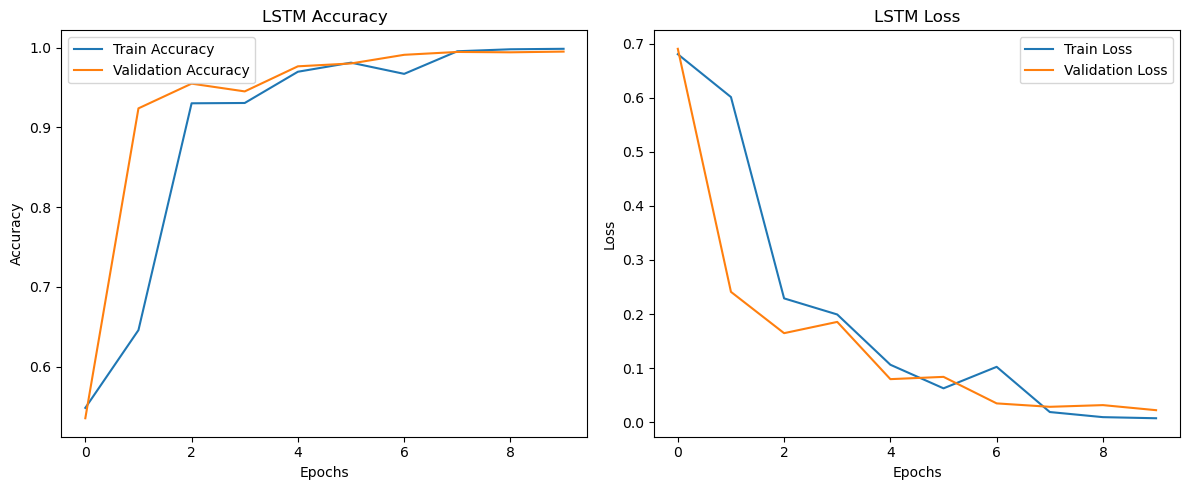

280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step


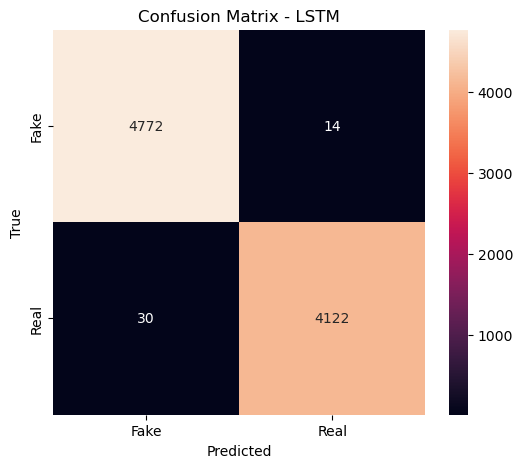

              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      4786
        Real       1.00      0.99      0.99      4152

    accuracy                           1.00      8938
   macro avg       1.00      0.99      1.00      8938
weighted avg       1.00      1.00      1.00      8938

280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step


In [416]:
# Build the LSTM model

lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

lstm_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
lstm_start_time = time.time()
lstm_history = lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)
lstm_end_time = time.time()
lstm_time_taken = (lstm_end_time - lstm_start_time) #seconds

lstm_model.summary()

plot_model_history_cf("LSTM", lstm_model, lstm_history, X_test_pad, lstm_time_taken)

In [418]:
# Performance metrics for Deep Learning Models
print("="*30 + " Deep Learning Models Performance Metrics " + "="*30 + "\n")
nn_metrics_df = pd.DataFrame({
    "Model": models,
    "Train Time": nn_fit_times,
    "Test Accuracy": nn_test_accuracies,
    "Train Accuracy": nn_train_accuracies,
    "Recall Score": nn_recalls,
    "f1 Score": nn_f1_scores
})

pd.set_option("display.max_colwidth", None)
nn_metrics_df = nn_metrics_df.set_index("Model")
nn_metrics_df

============================== Deep Learning Models Performance Metrics ==============================



,Train Time,Test Accuracy,Train Accuracy,Recall Score,f1 Score
Model,,,,,
CNN,124.65,0.998546,0.999608,0.998314,0.998434
LSTM,798.92,0.995077,0.998573,0.992775,0.994691


### Manual Testing

In [504]:
from sklearn.metrics import precision_recall_fscore_support

In [506]:
man_test = pd.read_csv("data/manual_test.csv")

In [508]:
man_test

,title,text,subject,date,label
0,Tech Company Launches AI Tool to Detect Deepfakes,"San Francisco, July. 15 (Reuters) — A California-based startup has unveiled an artificial intelligence tool designed to identify deepfake videos in real time. The software, trained on millions of synthetic and authentic clips, aims to help journalists, law enforcement, and social media platforms curb the spread of manipulated media. Early trials show a 92% detection accuracy, though experts warn that deepfake creators are constantly evolving their methods.",News,"July 15, 2025",1
1,Heatwave Breaks Records Across Southern Europe,"Rome, July 15 (NPR)— Temperatures soared past 44°C (111°F) in parts of Italy, Spain, and Greece this week, marking one of the most intense heatwaves in recent decades. Authorities have issued health warnings, advising residents to stay indoors during peak hours. Meteorologists link the extreme conditions to shifting climate patterns and prolonged droughts in the region.",worldnews,16-Jul-25,1
2,Ministry of Magic Issues Warning on Unauthorized Portkeys,"London, July 16 — The Ministry of Magic’s Department of Magical Transportation has issued a public advisory after three Muggles accidentally activated an unregistered Portkey in Yorkshire. The incident transported them to the outskirts of the Forbidden Forest, where they were found by Hogwarts staff. Officials remind witches and wizards that creating or using unregistered Portkeys carries a fine of up to 500 Galleons. Wizardry News Exclusive, Wizards only. Featured image via Getty Images",politics,16-Jul-25,0
3,Shire Farming Cooperative Reports Record Pipeweed Harvest,"Hobbiton, July 17 — The Shire’s annual agricultural report shows a 15% increase in pipeweed yield, the largest in two decades. Cooperative head Tobold Hornblower credits favorable weather and improved soil management techniques. Local inns have already begun stocking the new harvest, with tavern owners predicting a lively autumn festival season. SUPPORT OUR WORK BY SUBSCRIBING & BECOMING A MEMBER @SHIRE.TV",worldnews,17-Jul-25,0
4,NASA Confirms Discovery of Potentially Habitable Exoplanet,"Washington, July18 (Reuters) — NASA scientists have announced the discovery of an Earth-sized exoplanet located 120 light-years away in the habitable zone of its star. Named “Kepler-452c II,” the planet has surface temperatures suitable for liquid water. While no signs of life have been detected, the finding fuels interest in next-generation telescopes capable of analyzing exoplanet atmospheres",News,18-Jul-25,1
5,Gotham City to Deploy Bat-Signal Drones,"Gotham, July 19 — In a joint project with Wayne Enterprises, the Gotham City Police Department has begun testing aerial drones equipped with miniature Bat-Signals. The devices can be deployed during emergencies to summon Batman without relying on the central rooftop light. Commissioner Gordon says the technology will help during severe weather or power outages. FOLLOW US ON BATCRAZY.COM",News,"July 15, 2025",0
6,Major Data Breach Hits Global Hotel Chain,"New York, July. 8 (NPR) — A leading international hotel group has disclosed a cyberattack affecting over 8 million guest records. The breach exposed names, contact details, and partial payment information. The company has hired a cybersecurity firm to investigate and is offering free credit monitoring to affected customers. Authorities suspect a sophisticated ransomware group was behind the attack.",worldnews,8-Jul-25,1
7,King’s Landing Trade Guild Introduces Dragon-Friendly Shipping Routes,"King’s Landing, July 12.(TWEET) — In a landmark decision, the Capital Trade Guild has announced the creation of “dragon-friendly” shipping lanes along the Narrow Sea. The move aims to prevent cargo losses from accidental dragon encounters and to strengthen trade relations with House Targaryen. Merchant captains will receive updated maps at the guild hall starting next week. Featured image via Getty Images",News,12-Jul-25,0
8,Local Com

In [510]:
man_test["cleaned_text"] = man_test["text"].apply(process_text)

In [512]:
man_text = man_test["cleaned_text"]
y_man = man_test["label"]  # 0 = Fake, 1 = Real

In [514]:
X_man = tfidf.transform(man_text)

In [516]:
man_models = ["LogisticRegression", "DecisionTree", "KNN", "SVM", "RandomForest", "CNN", "LSTM"]
man_test_accuracies = []
man_recalls = []
man_f1_scores = []

In [518]:
# Confusion Matrix
def plot_conf_matrix(model_name, y_man_preds, y_man):
    y_pred = (y_man_preds > 0.5).astype(int).reshape(-1)
    
    cm = confusion_matrix(y_man, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Fake", "Real"],
                yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name} - Manual Testing")
    plt.savefig(f"images/manual_test_{model_name}_confustion_matrix.png")
    plt.show()

============================== Logistic Regression on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.6250    1.0000    0.7692         5
           1     1.0000    0.4000    0.5714         5

    accuracy                         0.7000        10
   macro avg     0.8125    0.7000    0.6703        10
weighted avg     0.8125    0.7000    0.6703        10



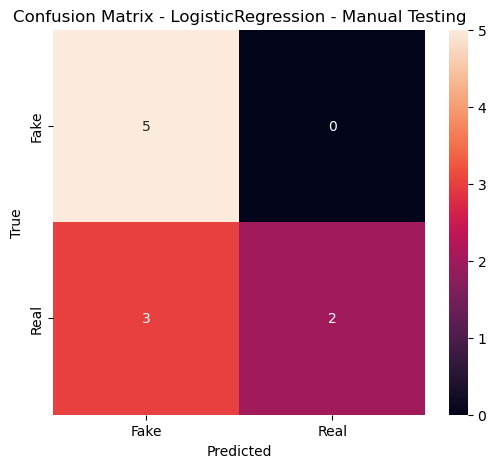

In [520]:
## Logistic Regression:
lr_man_preds = lr_grid.best_estimator_.predict(X_man)

lr_acc = accuracy_score(y_man, lr_man_preds)
lr_prec, lr_rec, lr_f1, _ = precision_recall_fscore_support(y_man, lr_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(lr_acc)
man_recalls.append(lr_rec)
man_f1_scores.append(lr_f1)

print("="*30 + " Logistic Regression on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, lr_man_preds, digits=4))

plot_conf_matrix("LogisticRegression", lr_man_preds, y_man)

============================== Decision Tree on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.6250    1.0000    0.7692         5
           1     1.0000    0.4000    0.5714         5

    accuracy                         0.7000        10
   macro avg     0.8125    0.7000    0.6703        10
weighted avg     0.8125    0.7000    0.6703        10



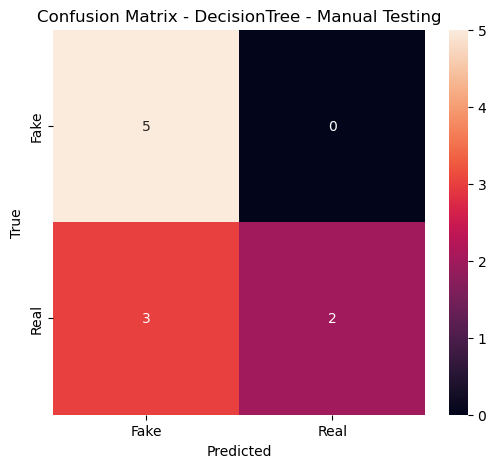

In [522]:
## Decision Tree: 
dt_man_preds = dtree_grid.best_estimator_.predict(X_man)

dt_acc = accuracy_score(y_man, dt_man_preds)
dt_prec, dt_rec, dt_f1, _ = precision_recall_fscore_support(y_man, dt_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(dt_acc)
man_recalls.append(dt_rec)
man_f1_scores.append(dt_f1)

print("="*30 + " Decision Tree on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, dt_man_preds, digits=4))

plot_conf_matrix("DecisionTree", dt_man_preds, y_man)

============================== K-Nearest Neighbors on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.4444    0.8000    0.5714         5
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.4000        10
   macro avg     0.2222    0.4000    0.2857        10
weighted avg     0.2222    0.4000    0.2857        10



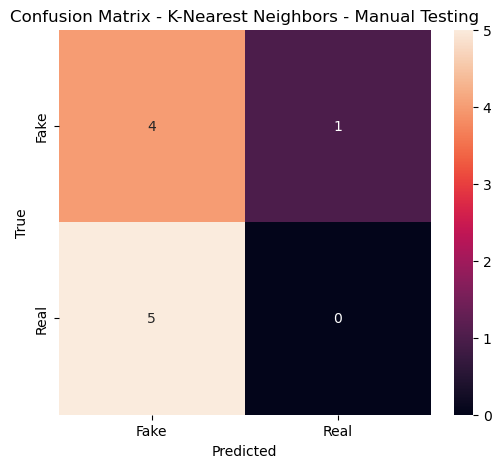

In [524]:
## KNN: 
knn_man_preds = knn_grid.best_estimator_.predict(X_man)

knn_acc = accuracy_score(y_man, knn_man_preds)
knn_prec, knn_rec, knn_f1, _ = precision_recall_fscore_support(y_man, knn_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(knn_acc)
man_recalls.append(knn_rec)
man_f1_scores.append(knn_f1)

print("="*30 + " K-Nearest Neighbors on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, knn_man_preds, digits=4))

plot_conf_matrix("K-Nearest Neighbors", knn_man_preds, y_man)

============================== Support Vector Machine Model on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.6667    0.8000    0.7273         5
           1     0.7500    0.6000    0.6667         5

    accuracy                         0.7000        10
   macro avg     0.7083    0.7000    0.6970        10
weighted avg     0.7083    0.7000    0.6970        10



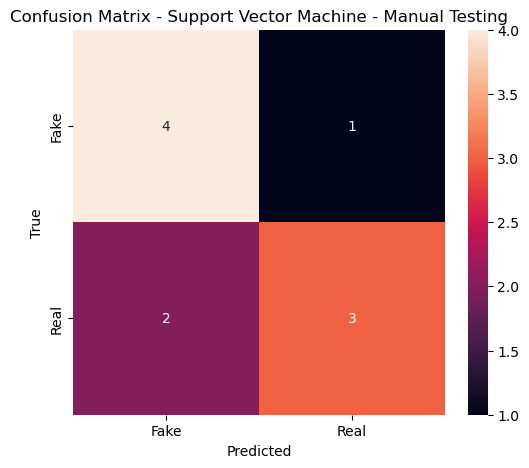

In [526]:
## Support Vector Machine: 
svm_man_preds = svm_grid.best_estimator_.predict(X_man)

svm_acc = accuracy_score(y_man, svm_man_preds)
svm_prec, svm_rec, svm_f1, _ = precision_recall_fscore_support(y_man, svm_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(svm_acc)
man_recalls.append(svm_rec)
man_f1_scores.append(svm_f1)

print("="*30 + " Support Vector Machine Model on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, svm_man_preds, digits=4))

plot_conf_matrix("Support Vector Machine", svm_man_preds, y_man)

============================== Random Forest Model on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.6250    1.0000    0.7692         5
           1     1.0000    0.4000    0.5714         5

    accuracy                         0.7000        10
   macro avg     0.8125    0.7000    0.6703        10
weighted avg     0.8125    0.7000    0.6703        10



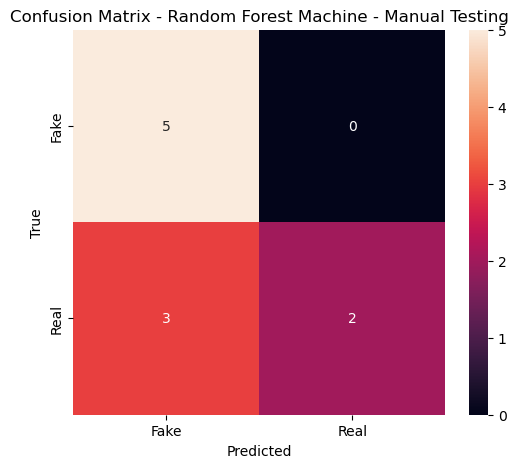

In [528]:
## Random Forest: 
rf_man_preds = rf_grid.best_estimator_.predict(X_man)

rf_acc = accuracy_score(y_man, rf_man_preds)
rf_prec, rf_rec, rf_f1, _ = precision_recall_fscore_support(y_man, rf_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(rf_acc)
man_recalls.append(rf_rec)
man_f1_scores.append(rf_f1)

print("="*30 + " Random Forest Model on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, rf_man_preds, digits=4))

plot_conf_matrix("Random Forest Machine", rf_man_preds, y_man)

In [531]:
## Tokenize and pad for CNN and LSTM:
man_seqs = tokenizer.texts_to_sequences(man_text)
man_pad = pad_sequences(man_seqs, maxlen=max_len, padding='post', truncating='post')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
============================== Convolutional Neural Network Model on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.6250    1.0000    0.7692         5
           1     1.0000    0.4000    0.5714         5

    accuracy                         0.7000        10
   macro avg     0.8125    0.7000    0.6703        10
weighted avg     0.8125    0.7000    0.6703        10



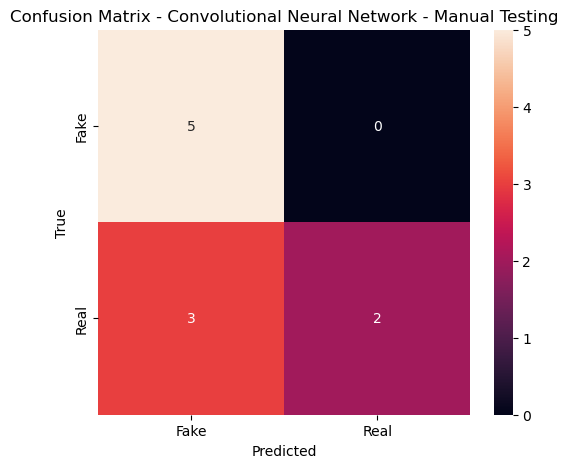

In [533]:
# Convolutional Neural Network
cnn_man_prob = cnn_model.predict(man_pad)
cnn_man_preds = (cnn_man_prob >= 0.5).astype(int).ravel()

cnn_man_acc = accuracy_score(y_man, cnn_man_preds)
cnn_prec, cnn_rec, cnn_f1, _ = precision_recall_fscore_support(y_man, cnn_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(cnn_man_acc)
man_recalls.append(cnn_rec)
man_f1_scores.append(cnn_f1)

print("="*30 + " Convolutional Neural Network Model on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, cnn_man_preds, digits=4))

plot_conf_matrix("Convolutional Neural Network", cnn_man_preds, y_man)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
============================== Long- Short Term Memory Model (RNN) on Manual Test Dataset ==============================

              precision    recall  f1-score   support

           0     0.8000    0.8000    0.8000         5
           1     0.8000    0.8000    0.8000         5

    accuracy                         0.8000        10
   macro avg     0.8000    0.8000    0.8000        10
weighted avg     0.8000    0.8000    0.8000        10



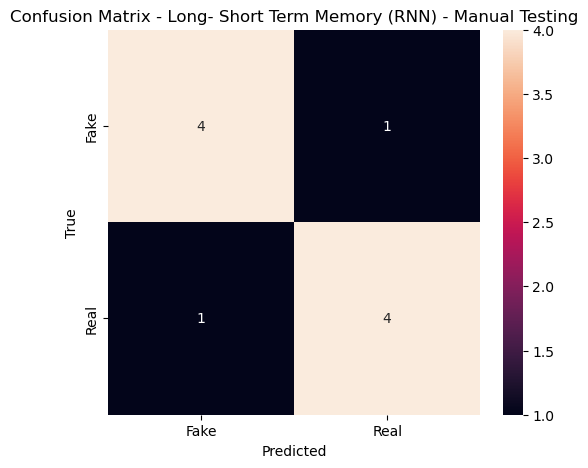

In [535]:
# Long- Short Term Memory Model - Recursive Neural Network
lstm_man_prob = lstm_model.predict(man_pad)
lstm_man_preds = (lstm_man_prob >= 0.5).astype(int).ravel()

lstm_man_acc = accuracy_score(y_man, lstm_man_preds)
lstm_prec, lstm_rec, lstm_f1, _ = precision_recall_fscore_support(y_man, lstm_man_preds, average="binary", zero_division=0)

man_test_accuracies.append(lstm_man_acc)
man_recalls.append(lstm_rec)
man_f1_scores.append(lstm_f1)

print("="*30 + " Long- Short Term Memory Model (RNN) on Manual Test Dataset " + "="*30 + "\n")
print(classification_report(y_man, lstm_man_preds, digits=4))

plot_conf_matrix("Long- Short Term Memory (RNN)", lstm_man_preds, y_man)